## Advance Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

### Goals of the Case Study

- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing and Understanding the Data

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [126]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL        65.00     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2,003.00          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL        80.00     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN        0.00        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1,976.00          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL        68.00    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2,001.00          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL        60.00     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN        0.00        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [127]:
df.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal   MoSold   YrSold  SalePrice
count 1,460.00    1,460.00     1,201.00   1,460.00     1,460.00     1,460.00   1,460.00      1,460.00    1,452.00    1,460.00    1,460.00   1,460.00     1,460.00  1,460.00  1,460.00      1,460.00   1,460.00      1,460.00      1,460.00  1,460.00  1,460.00      1,460.00      1,460.00      1,460.00    1,460.00     1,379.00    1,460.00    1,460.00    1,460.00     1,460.00       1,460.00   1,460.00     1,460.00  1,460.00  1,460.00 1,460.00 1,460.00   1,460.00
mean    730.50       56.90        70.05  10,516.83         6.10         5.58   1,971.27      1,984.87      103.69      443.64       46.55     567.24     1,057.43  1,162.63    346.99          5.84   1,515.46          0.43          0.06      1.57      0.38          2.87          1.05          6.52        0.61     1,978.51        1.77      472.98       94.24        46.66          21.95       3.41        15.06      2.76     43.49     6.32 2,007.82 180,921.20
std     421.61       42.30        24.28   9,981.26         1.38         1.11      30.20         20.65      181.07      456.10      161.32     441.87       438.71    386.59    436.53         48.62     525.48          0.52          0.24      0.55      0.50          0.82          0.22          1.63        0.64        24.69        0.75      213.80      125.34        66.26          61.12      29.32        55.76     40.18    496.12     2.70     1.33  79,442.50
min       1.00       20.00        21.00   1,300.00         1.00         1.00   1,872.00      1,950.00        0.00        0.00        0.00       0.00         0.00    334.00      0.00          0.00     334.00          0.00          0.00      0.00      0.00          0.00          0.00          2.00        0.00     1,900.00        0.00        0.00        0.00         0.00           0.00       0.00         0.00      0.00      0.00     1.00 2,006.00  34,900.00
25%     365.75       20.00        59.00   7,553.50         5.00         5.00   1,954.00      1,967.00        0.00        0.00        0.00     223.00       795.75    882.00      0.00          0.00   1,129.50          0.00          0.00      1.00      0.00          2.00          1.00          5.00        0.00     1,961.00        1.00      334.50        0.00         0.00           0.00       0.00         0.00      0.00      0.00     5.00 2,007.00 129,975.00
50%     730.50       50.00        69.00   9,478.50         6.00         5.00   1,973.00      1,994.00        0.00      383.50        0.00     477.50       991.50  1,087.00      0.00          0.00   1,464.00          0.00          0.00      2.00      0.00          3.00          1.00          6.00        1.00     1,980.00        2.00      480.00        0.00        25.00           0.00       0.00         0.00      0.00      0.00     6.00 2,008.00 163,000.00
75%   1,095.25       70.00        80.00  11,601.50         7.00         6.00   2,000.00      2,004.00      166.00      712.25        0.00     808.00     1,298.25  1,391.25    728.00          0.00   1,776.75          1.00          0.00      2.00      1.00          3.00          1.00          7.00        1.00     2,002.00        2.00      576.00      168.00        68.00           0.00       0.00         0.00      0.00      0.00     8.00 2,009.00 214,000.00
max   1,460.00      190.00       313.00 215,245.00        10.00         9.00   2,010.00      2,010.00    1,600.00    5,644.00    1,474.00   2,336.00     6,110.00  4,692.00  2,065.00        572.00   5,642.00          3.00          2.00      3.00      2.00          8.00          3.00         14.00        3.00     2,010.00        4.00    1,4

In [128]:
df.shape

(1460, 81)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Checking for nulls

##### Drop columns with maximum missing values

In [130]:
df = df.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##### check Missing values of columns

In [132]:

df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

##### check and update missing values for 'FireplaceQu'

In [133]:
df.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [134]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [135]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

##### check unique values of LotFrontage

In [136]:

df.LotFrontage.value_counts()

LotFrontage
60.00     143
70.00      70
80.00      69
50.00      57
75.00      53
         ... 
137.00      1
141.00      1
38.00       1
140.00      1
46.00       1
Name: count, Length: 110, dtype: int64

##### check median of LotFrontage

In [137]:

LotFrontage_median = df.LotFrontage.median()
LotFrontage_median

69.0

##### update missing values of LotFrontage with median value

In [138]:
df.LotFrontage = df.LotFrontage.fillna(LotFrontage_median)

In [139]:
df.isnull().sum()[df.isnull().sum()>0]

MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

##### update missing values of MasVnrType

In [140]:
df.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

##### Replacing Nan values of MasVnrArea with None

In [141]:
df.MasVnrType = df.MasVnrType.fillna('None')

In [142]:
df.isnull().sum()[df.isnull().sum()>0]

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

##### Update missing values of MasVnrArea with median

In [143]:
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())

In [144]:
df.isnull().sum()[df.isnull().sum()>0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

##### Replace Nan values of BsmtQual with NA

In [145]:
df.BsmtQual = df.BsmtQual.fillna('NA')

##### Replace Nan values of BsmtCond with NA 

In [146]:
df.BsmtCond = df.BsmtCond.fillna('NA')

##### Replace Nan values of BsmtExposure with No

In [147]:
df.BsmtExposure = df.BsmtExposure.fillna('No')

##### Replace Nan values of BsmtFinType1 with NA

In [148]:
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')


##### Replace Nan values of BsmtFinType2 with NA 

In [149]:
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

In [150]:
df.isnull().sum()[df.isnull().sum()>0]

Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

##### Update missing values for Electrical

In [151]:
df.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

##### Update  missing values with mode since this is a categorical column

In [152]:
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])

##### Replace Nan values of GarageType with NA

In [153]:
df.GarageType = df.GarageType.fillna('NA')

##### Replace Nan values of GarageYrBlt with 0

In [154]:
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

##### Replace Nan values of GarageFinish with NA 

In [155]:
df.GarageFinish = df.GarageFinish.fillna('NA')

##### Replace Nan values of GarageQual with NA

In [156]:
df.GarageQual = df.GarageQual.fillna('NA')

##### Replace Nan values of GarageFinish with NA

In [157]:
df.GarageQual = df.GarageQual.fillna('NA')

In [158]:
##### Replace Nan values of GarageCond with NA

In [159]:
df.GarageCond = df.GarageCond.fillna('NA')

In [160]:
#check missing values again
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

##### Now that null data is handled, we can start with data conversion

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##### Converting MSSubClass, OverallQual and OverallCond to StringType

In [162]:
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

##### Converting LotFrontage and MasVnrArea to numeric.

In [163]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [164]:
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

### Data Analysis:

#### Univariate Analysis

##### First let us analyse the target variable 'SalePrice'

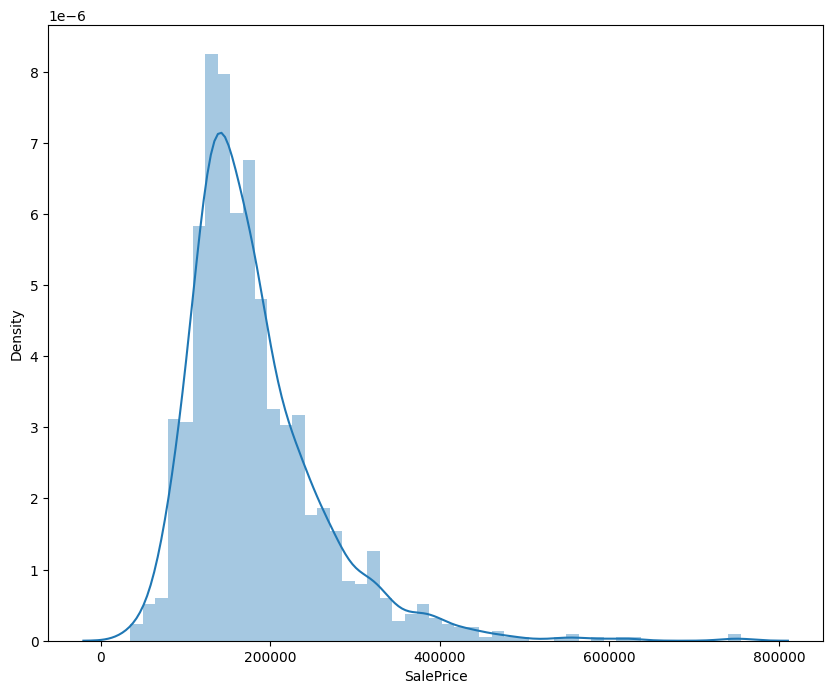

In [165]:

plt.figure(figsize=[10,8])
sns.distplot(df.SalePrice);

 Target Variable is right skewed

Checking the skewness of the target variable

In [166]:
df.SalePrice.skew()

1.8828757597682129

The skewness is greater than 1, so the target variable is highly skewed.

Check the kurtosis of target variable

In [167]:
df.SalePrice.kurt()

6.536281860064529

So, we will log transform our target variable

In [168]:
df.SalePrice = np.log(df.SalePrice)

In [169]:
df['SalePrice'].skew()

0.12133506220520406

In [170]:
df.SalePrice.kurt()

0.8095319958036296

Both skewness and kurtosis are less than 1 now

Plotting target variable again

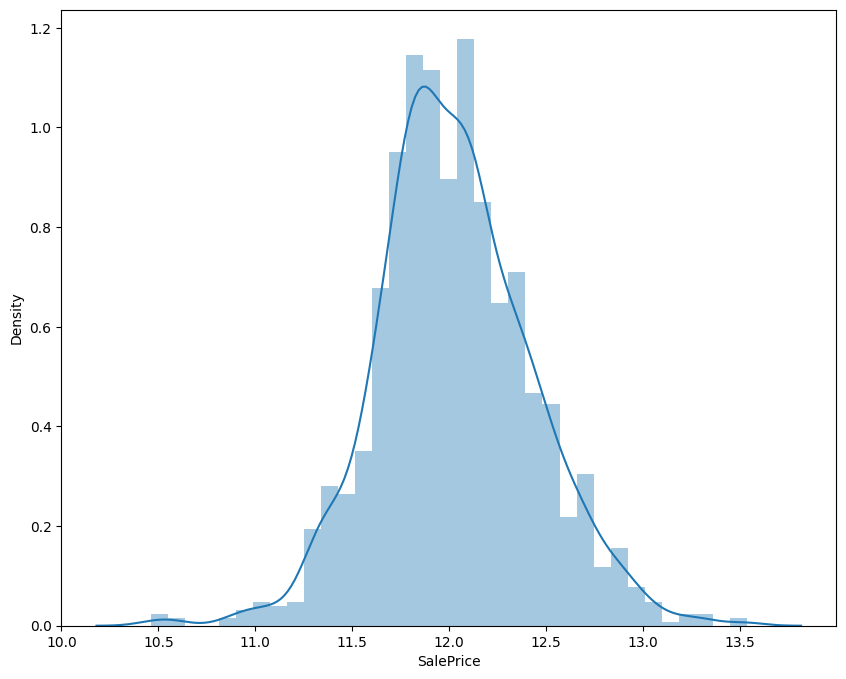

In [171]:
plt.figure(figsize=[10,8])
sns.distplot(df.SalePrice);

Target variable has normal distribution now

##### Now, let us divide the data into numerical and categorical for EDA

Extracting numerical columns

In [172]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0   1        65.00     8450       2003          2003      196.00         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0     2,003.00           2         548           0           61              0          0            0         0        0       2    2008      12.25
1   2        80.00     9600       1976          1976        0.00         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1     1,976.00           2         460         298            0              0          0            0         0        0       5    2007      12.11
2   3        68.00    11250       2001          2002      162.00         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1     2,001.00           2         608           0           42              0          0            0         0        0       9    2008      12.32
3   4        60.00     9550       1915          1970        0.00         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1     1,998.00           3         642           0           35            272          0            0         0        0       2    2006      11.85
4   5        84.00    14260       2000          2000      350.00         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1     2,000.00           3         836         192           84              0          0            0         0        0      12    2008      12.43

Extracting categorical columns

In [173]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0         60       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          NA     Attchd          RFn         TA         TA          Y       WD        Normal
1         20       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
2         60       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal
3         70       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y       WD       Abnorml
4         60       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y       WD        Normal

#### EDA on Numerical Columns

##### View the distribution of all numeric variables using histograms and boxplots

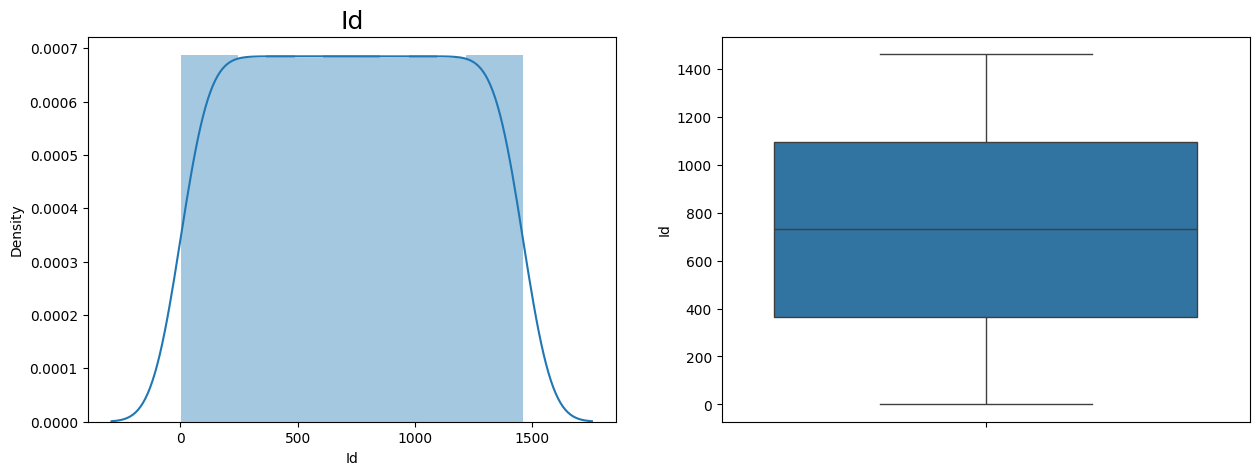

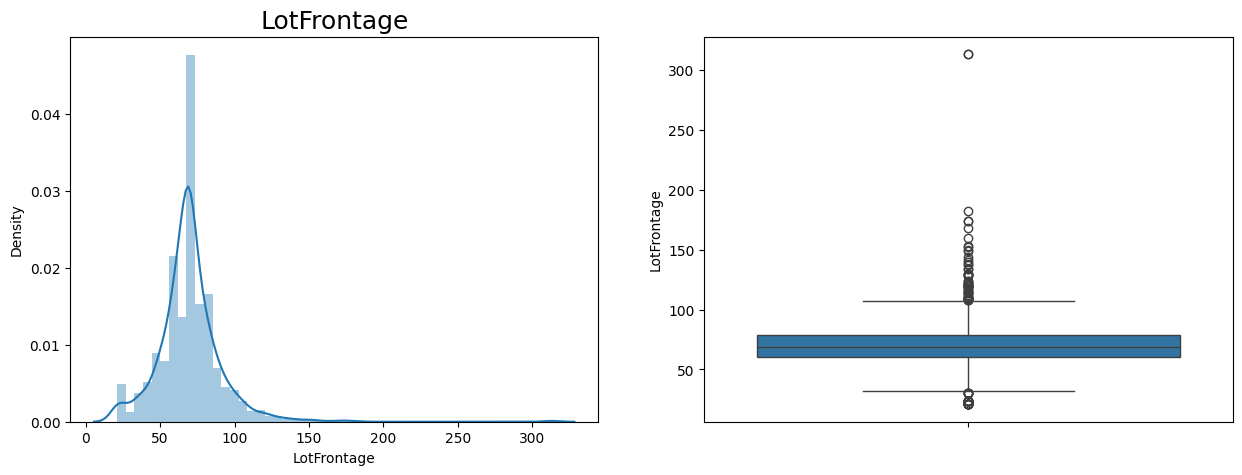

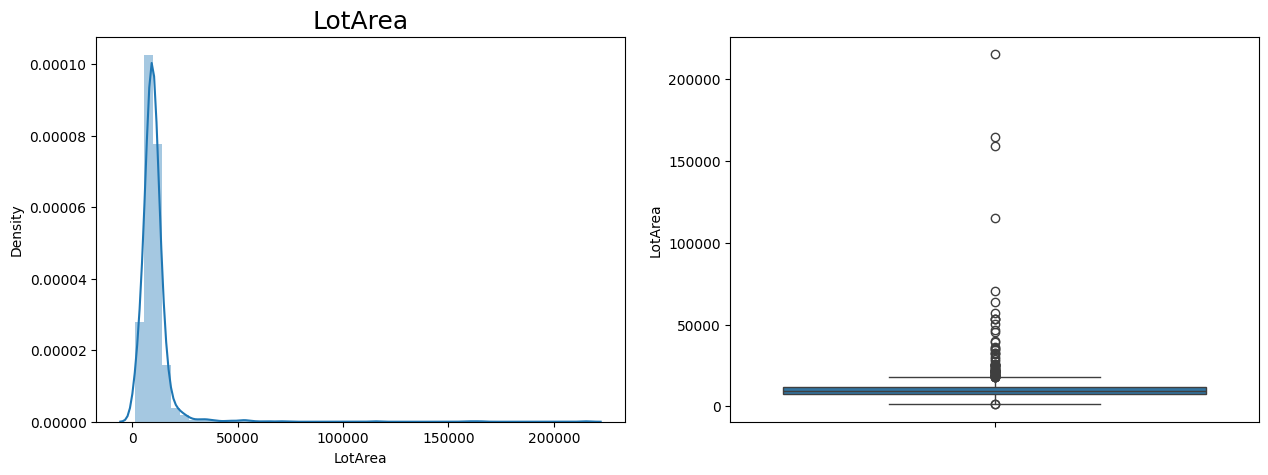

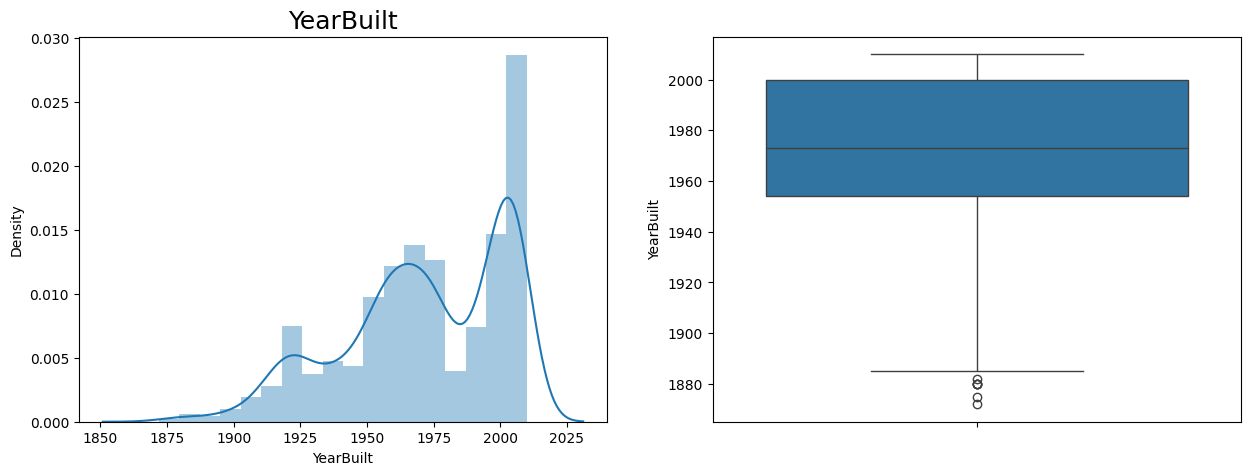

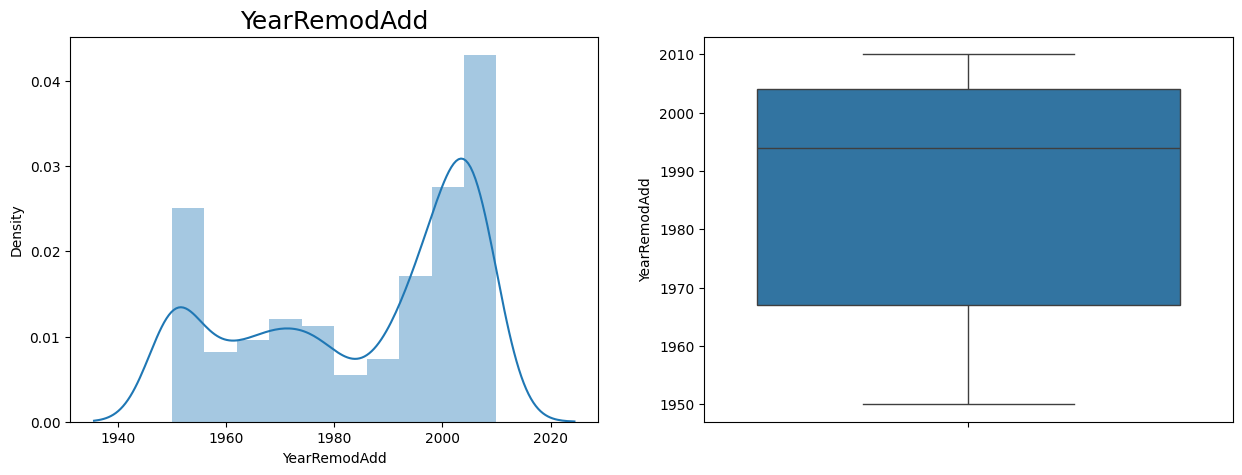

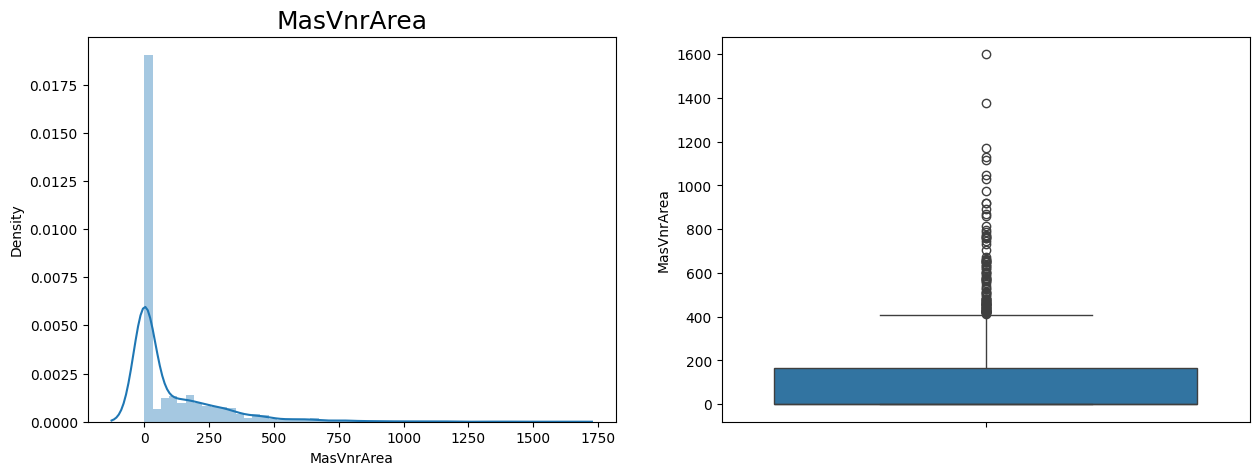

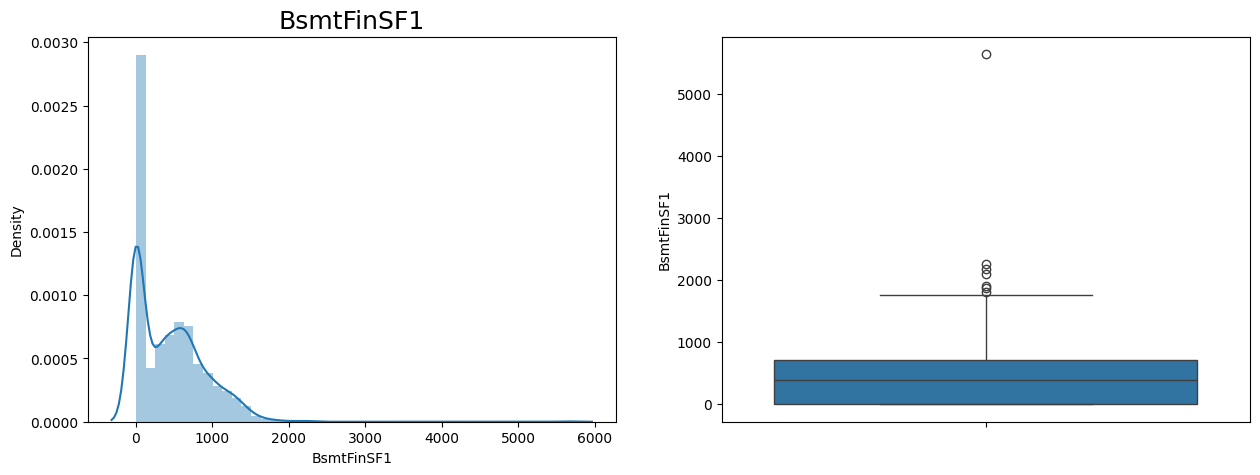

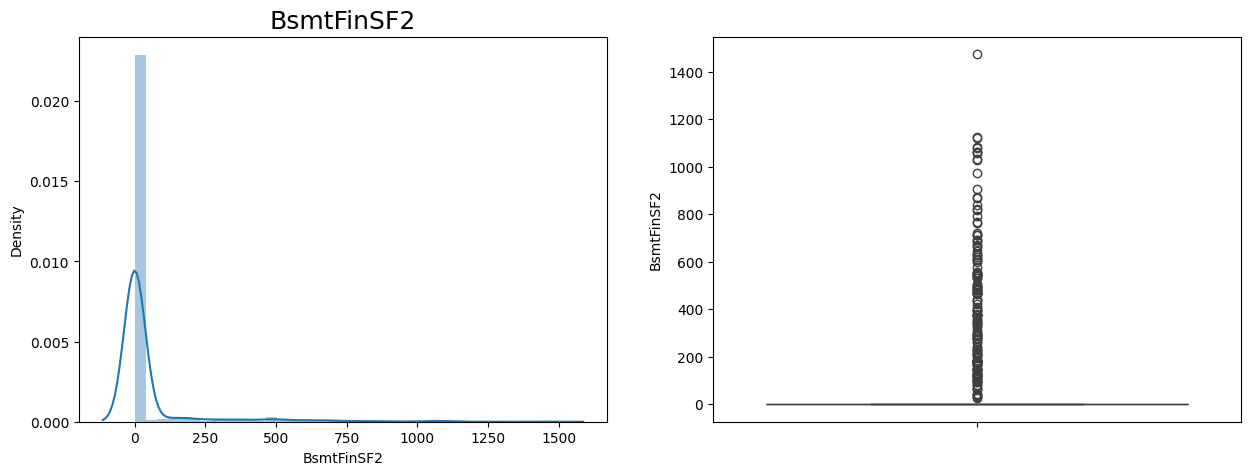

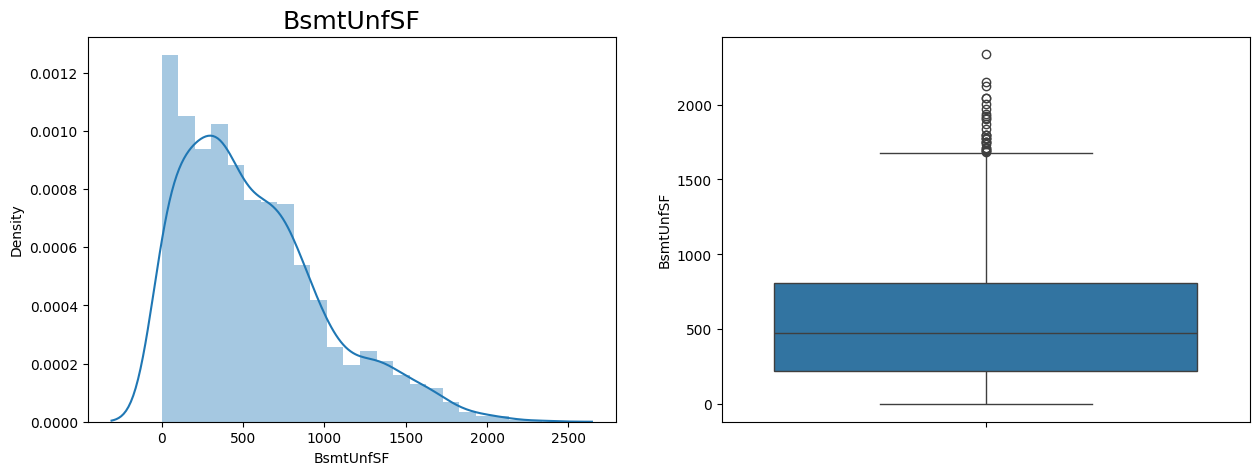

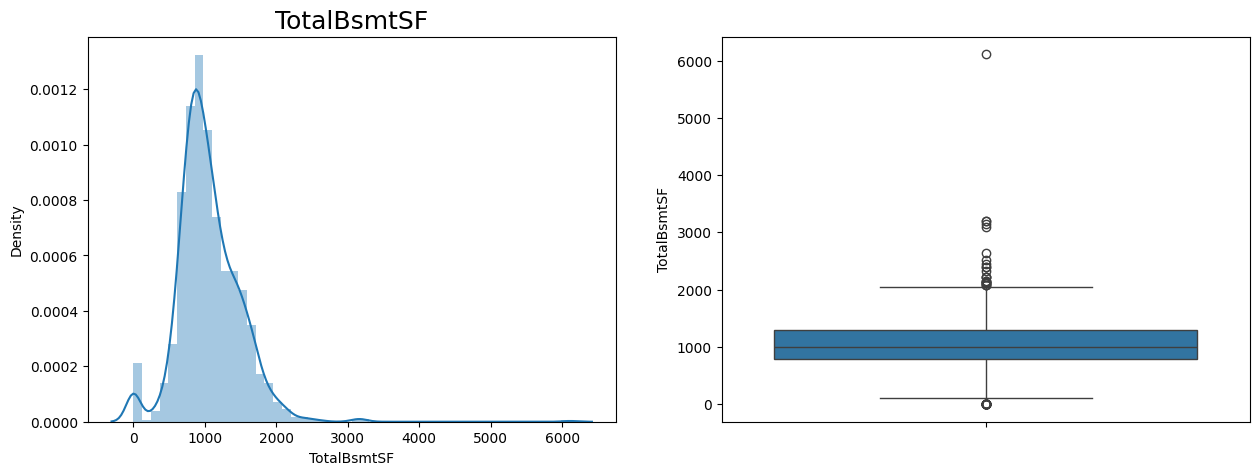

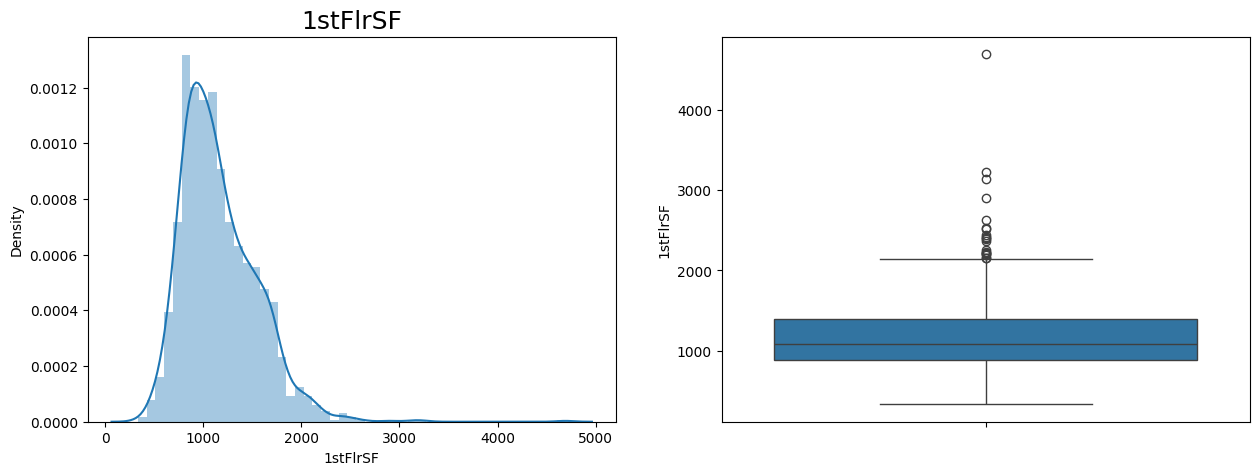

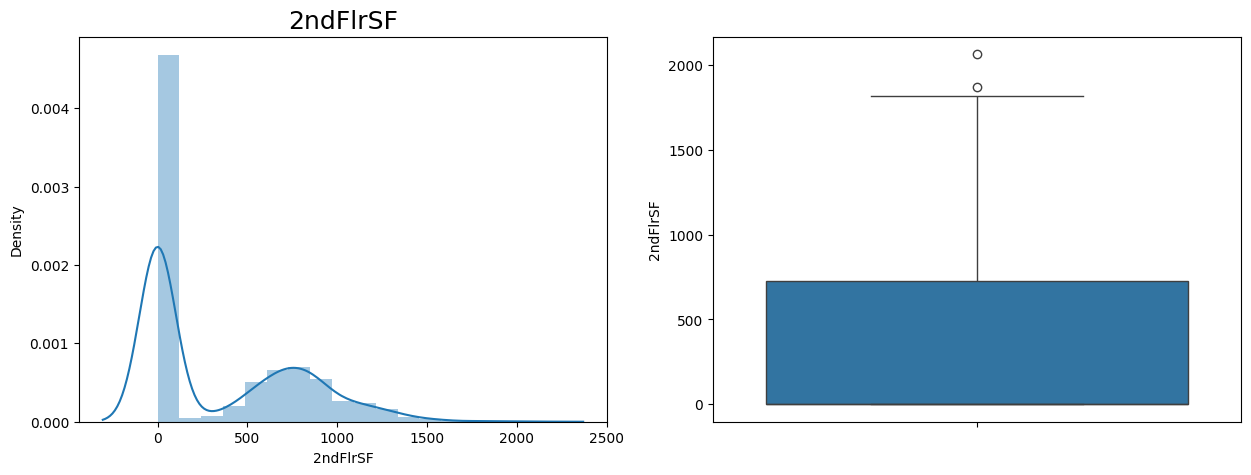

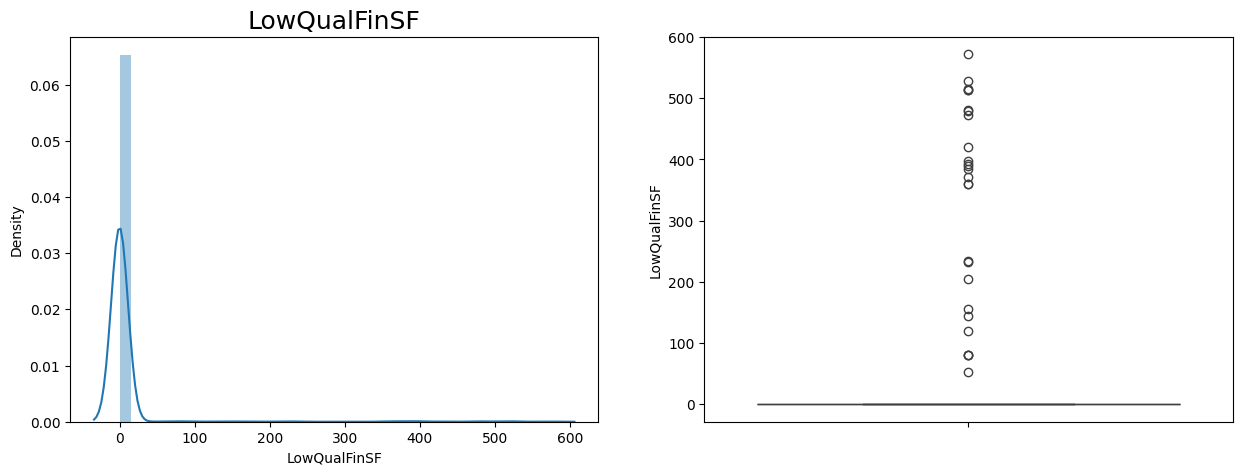

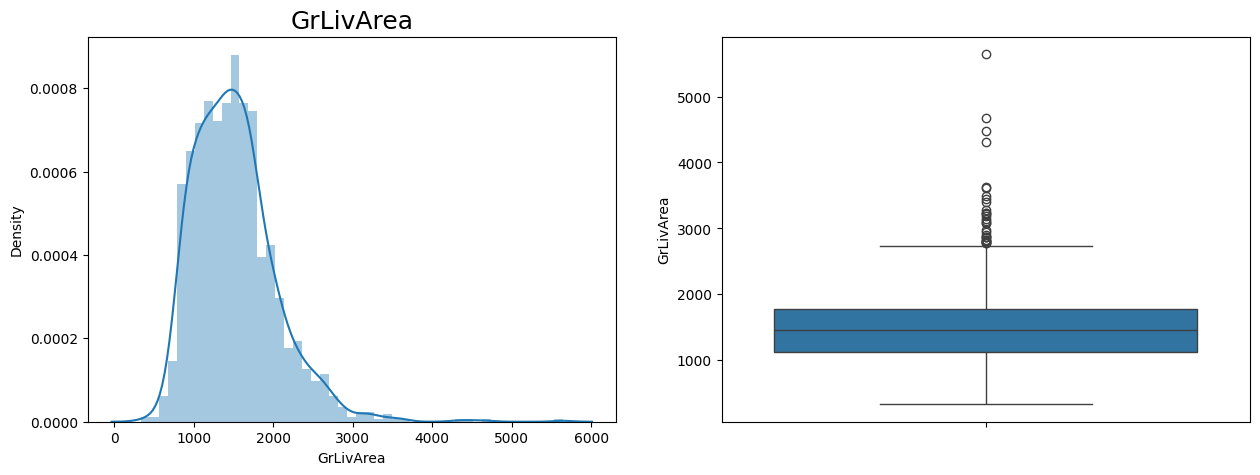

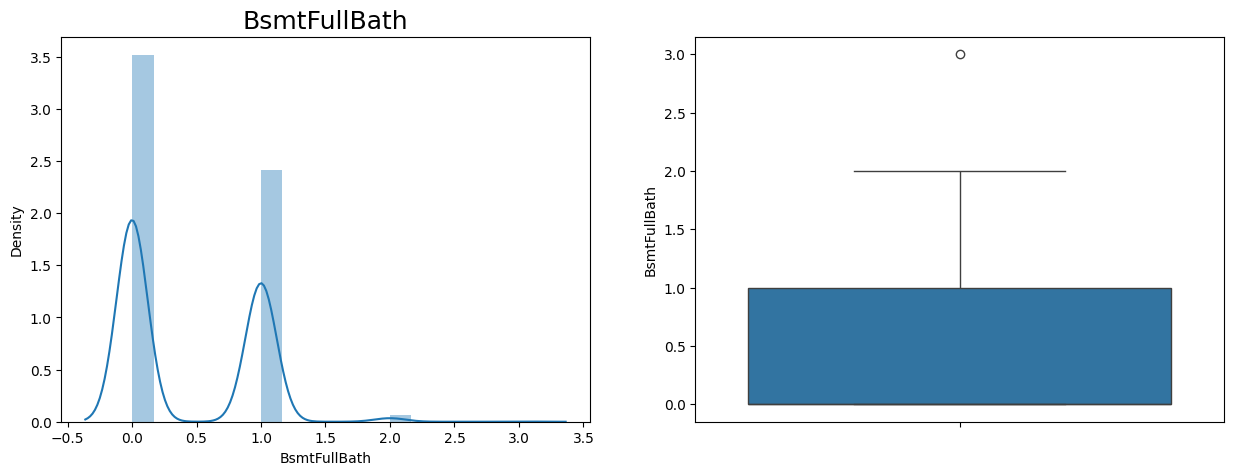

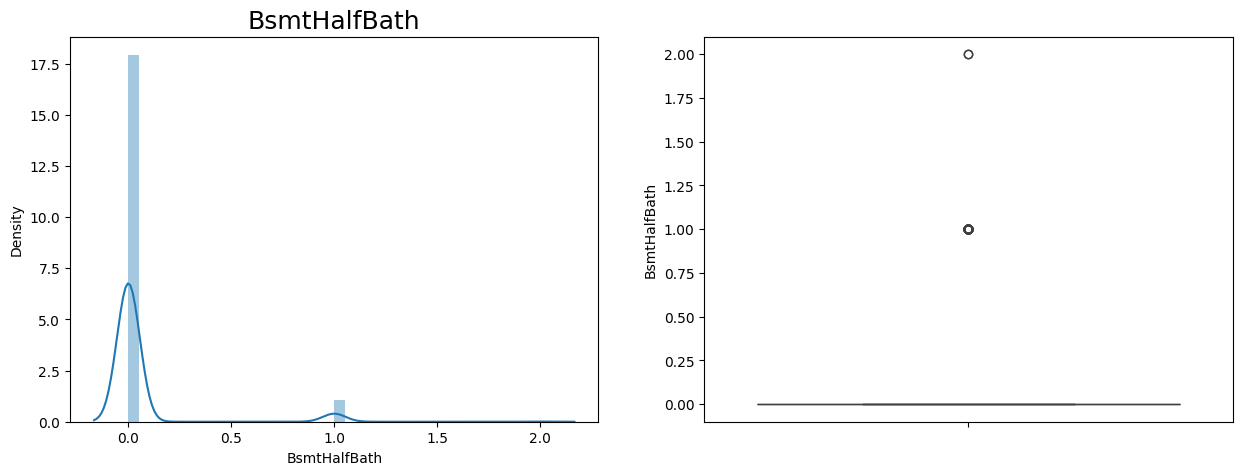

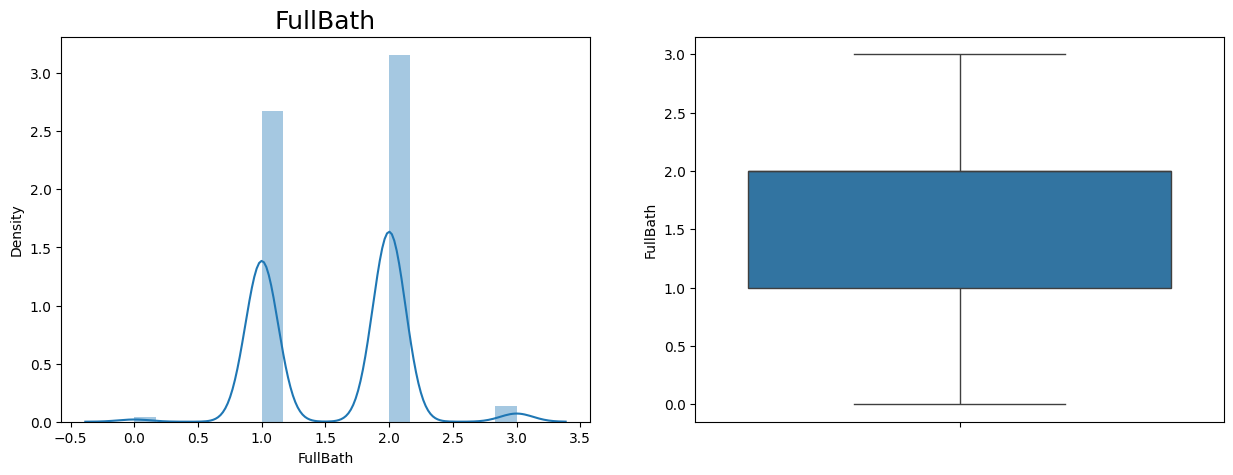

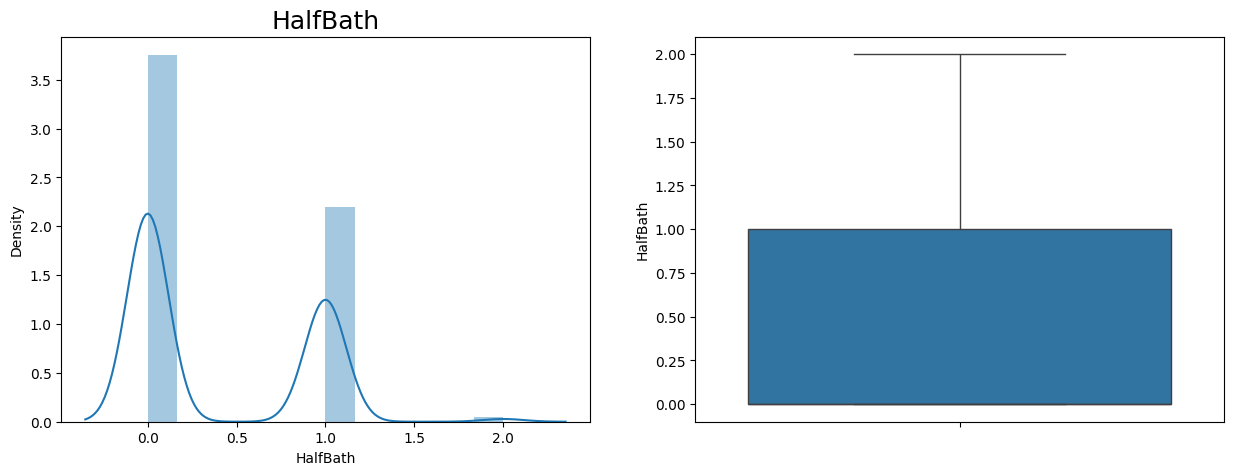

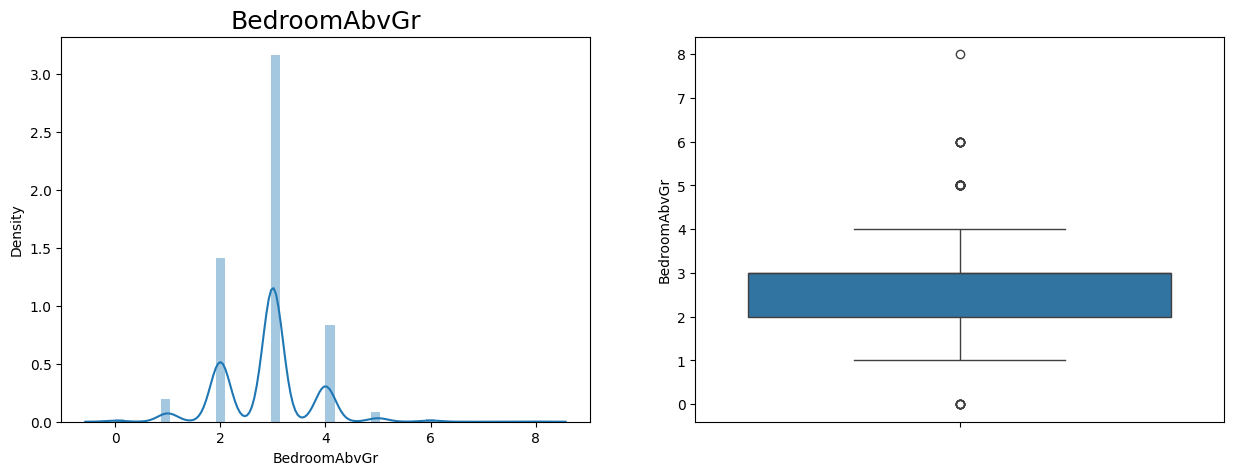

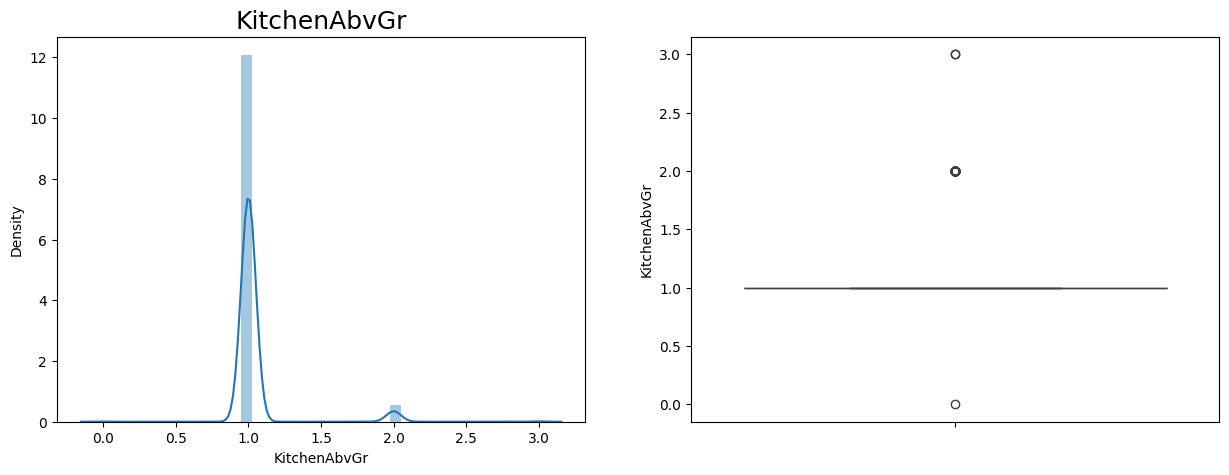

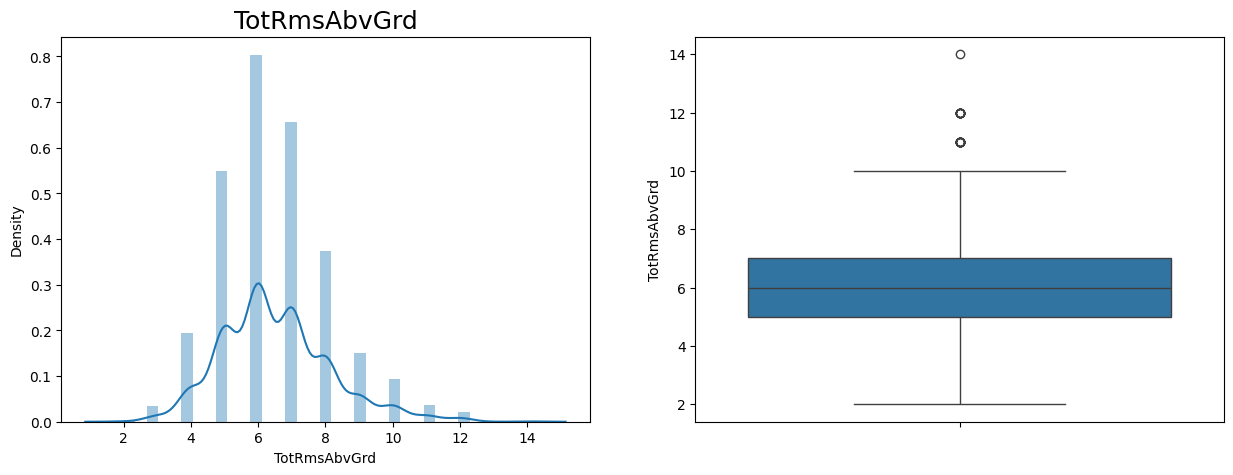

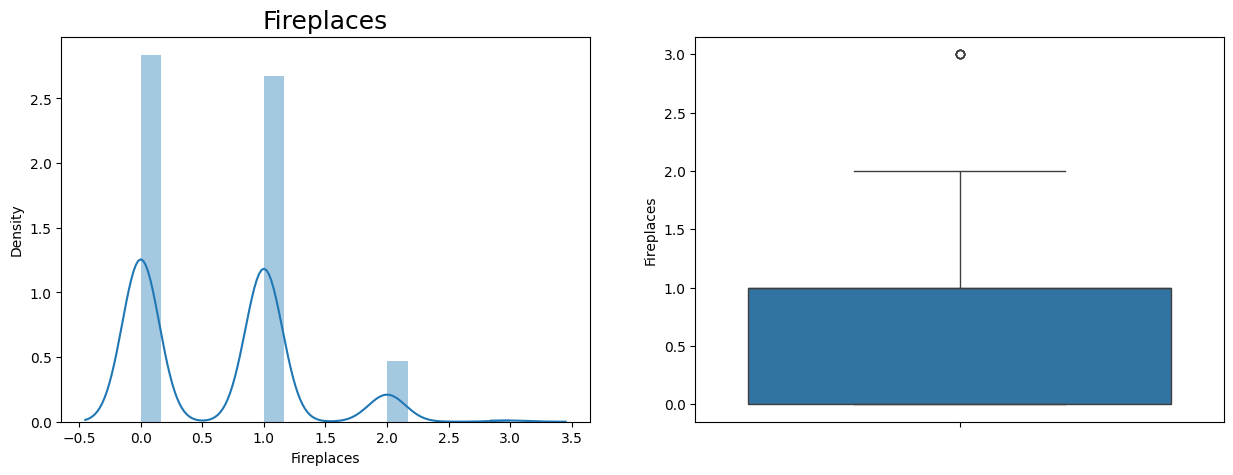

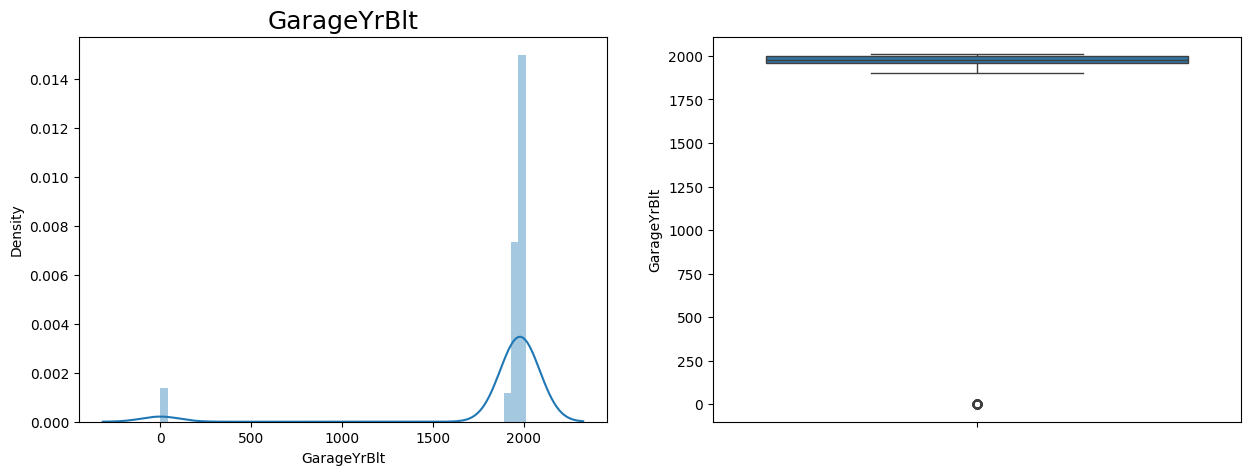

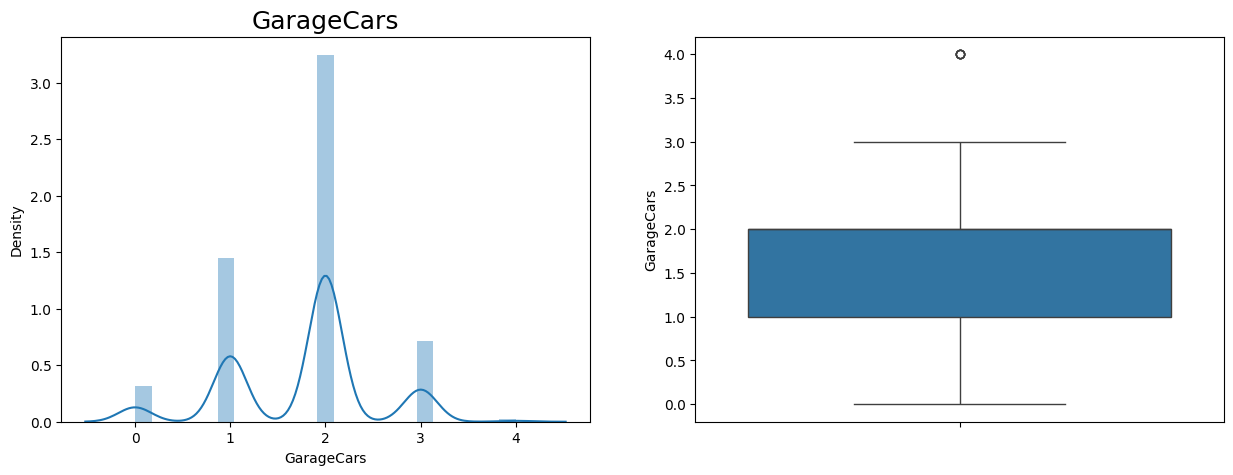

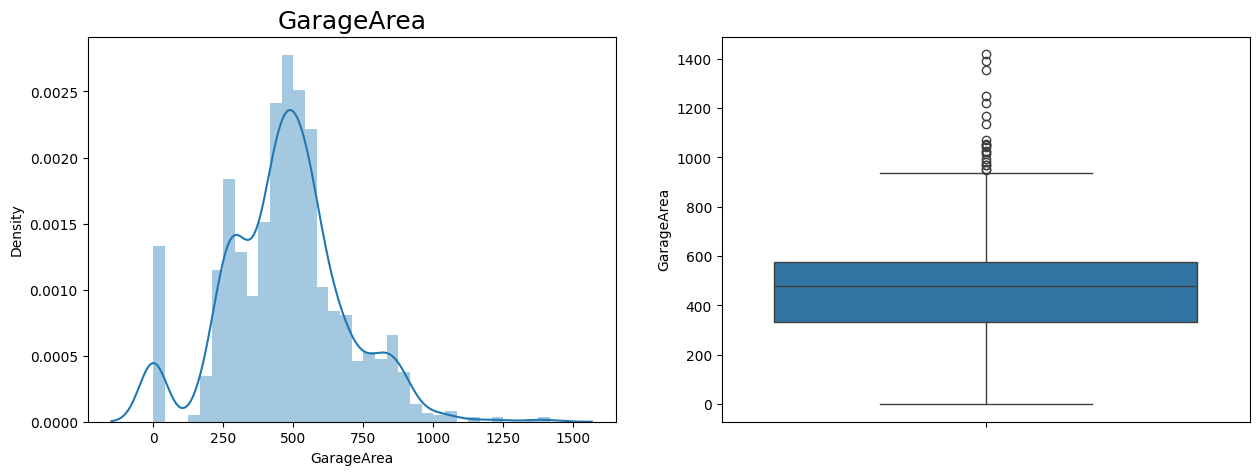

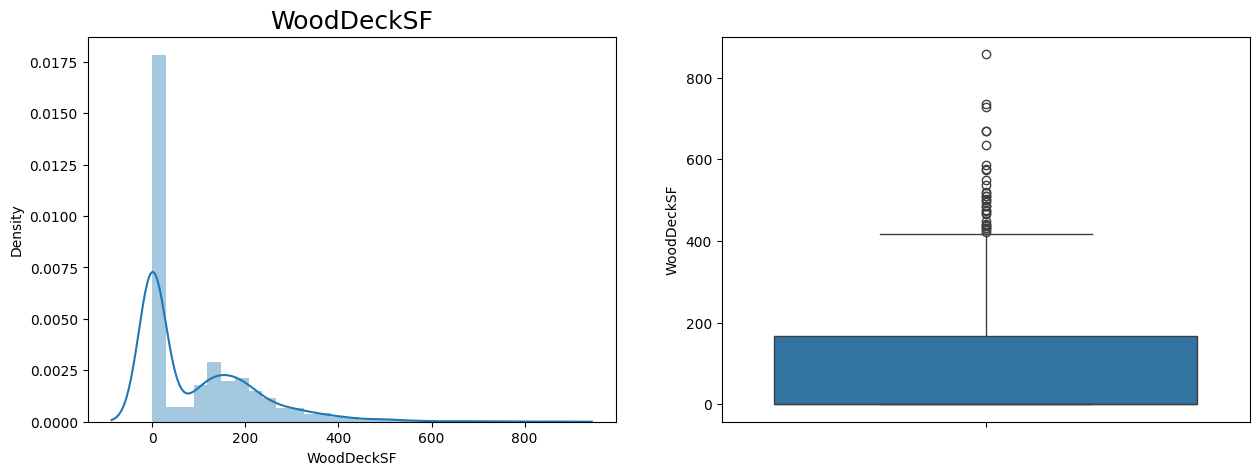

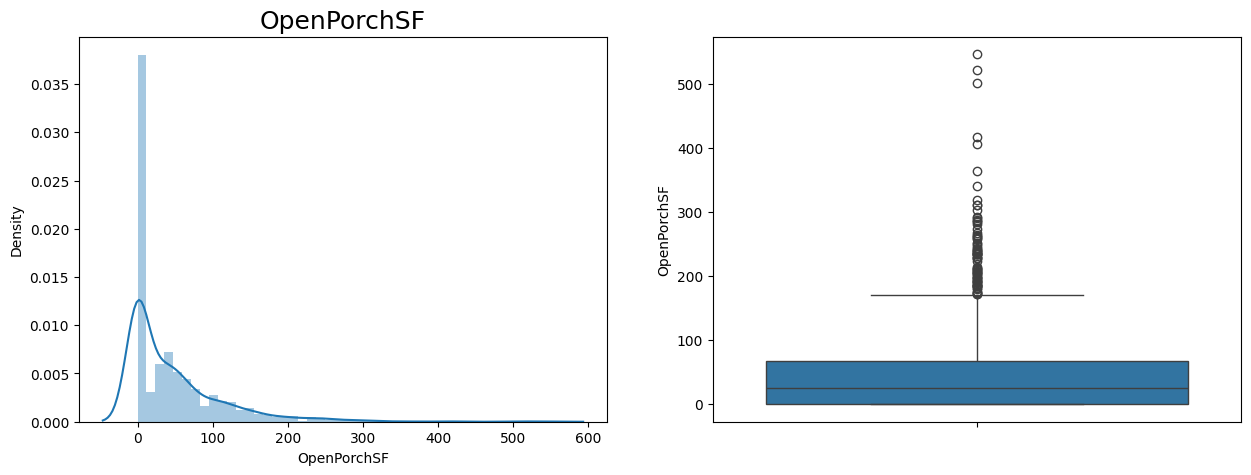

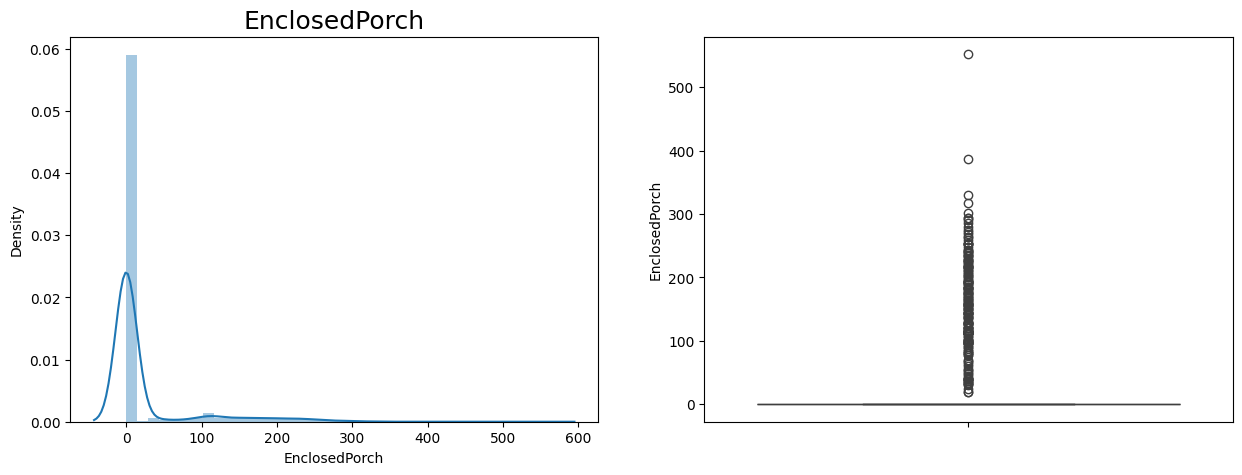

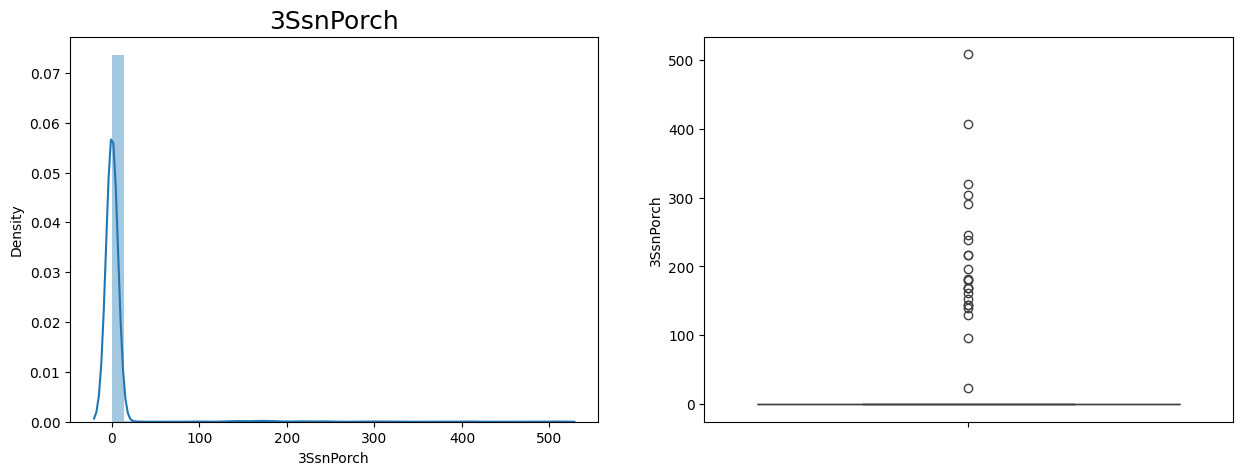

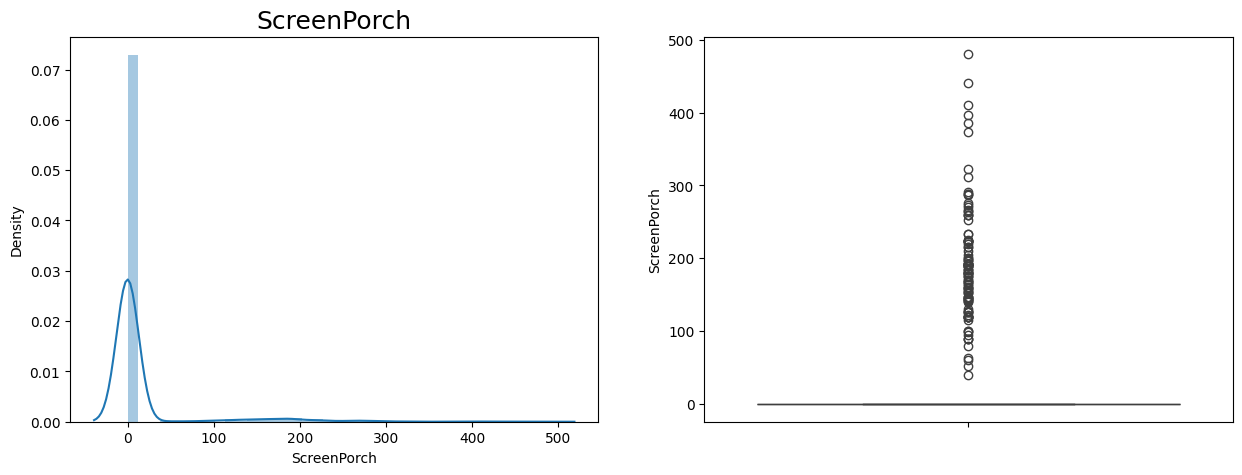

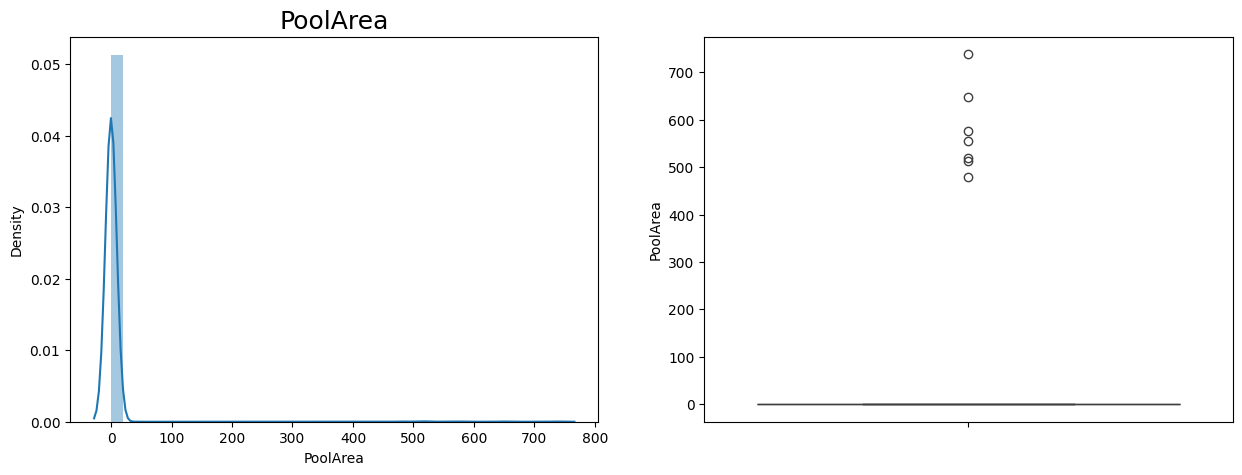

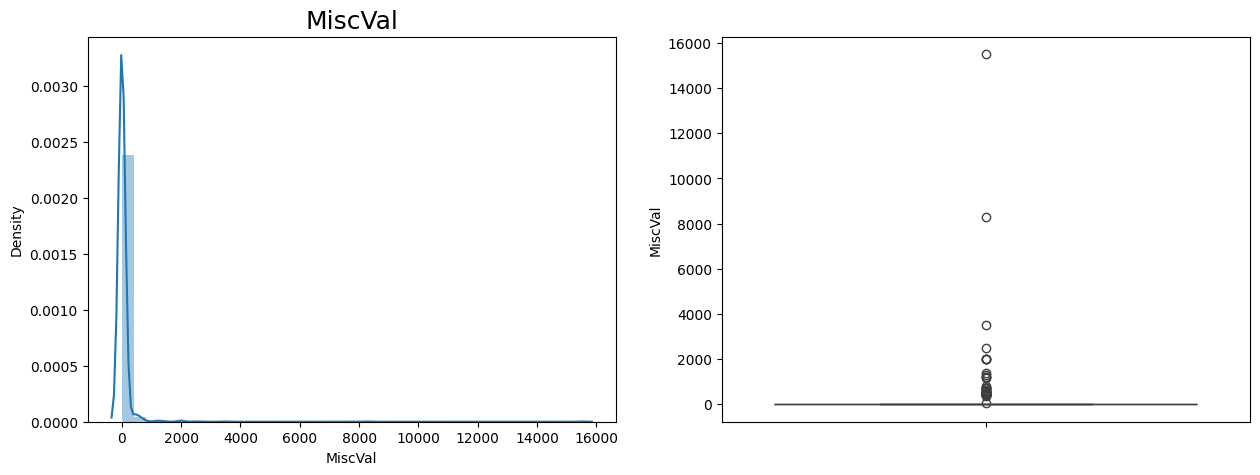

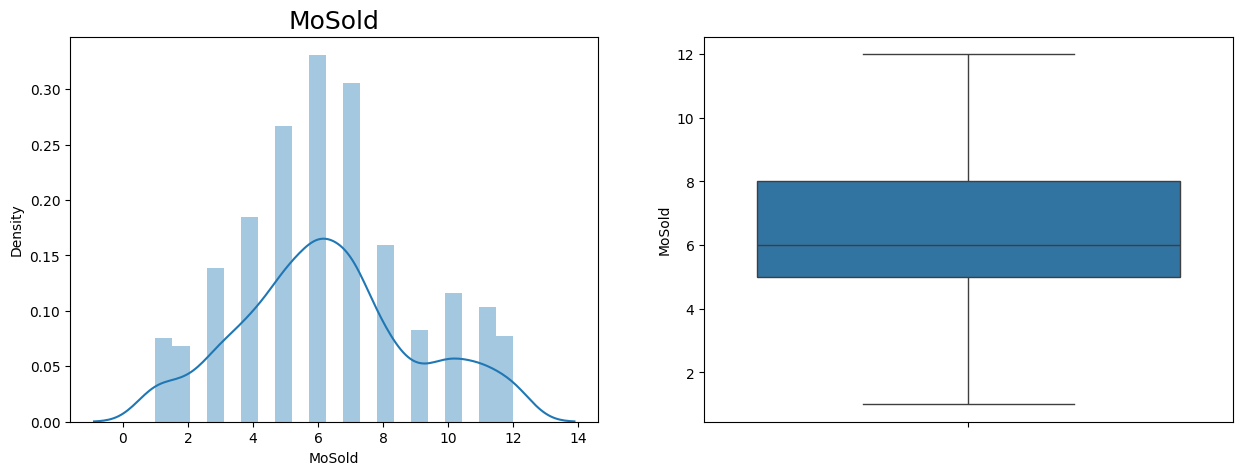

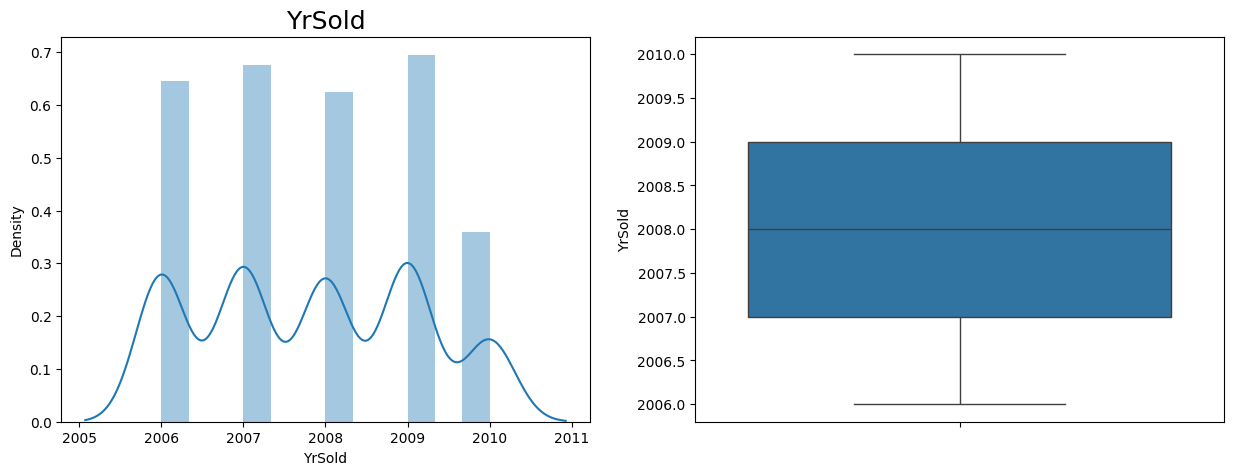

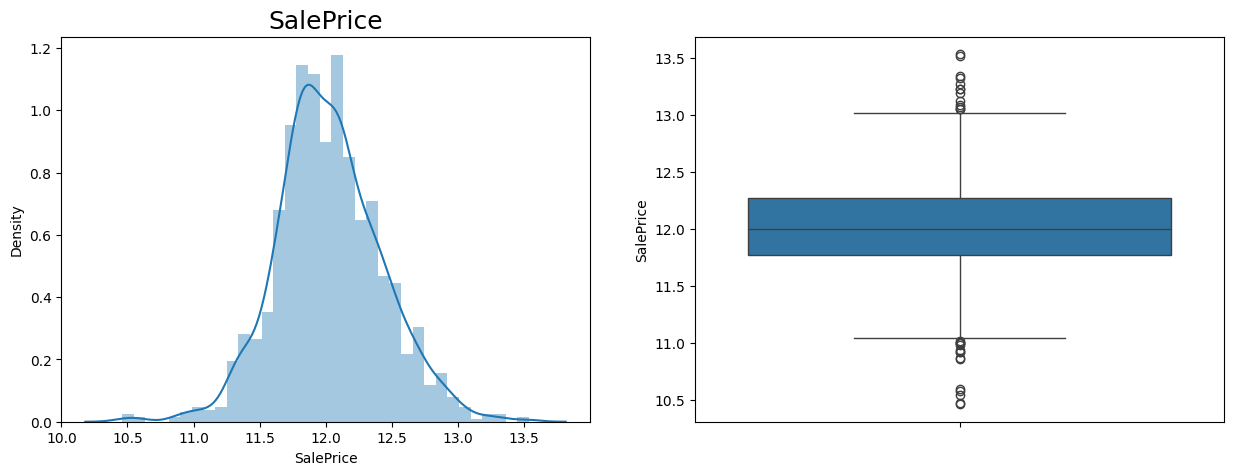

In [174]:
for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

Many columns do not have normal distribution and have outliers.

#### EDA on Categorical columns

##### Checking unique variables for all the columns

In [175]:
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' '

##### Visualising the above values

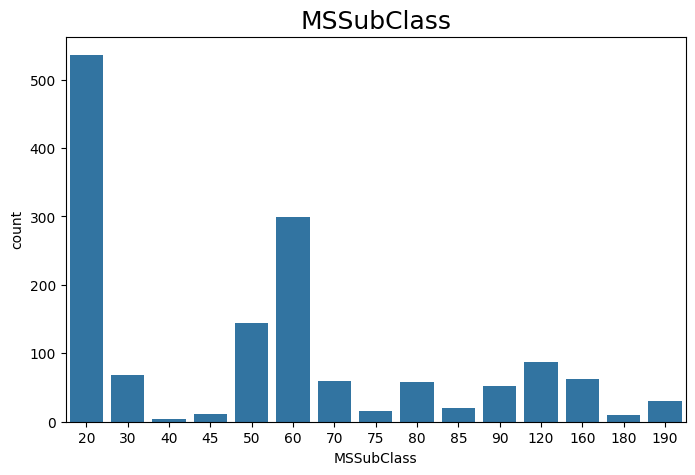

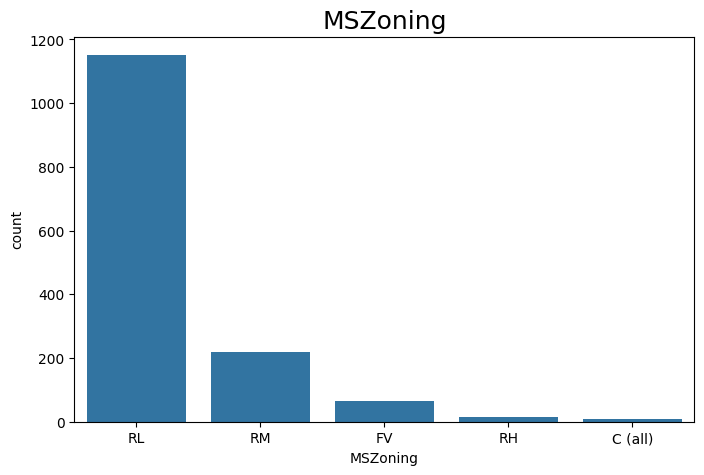

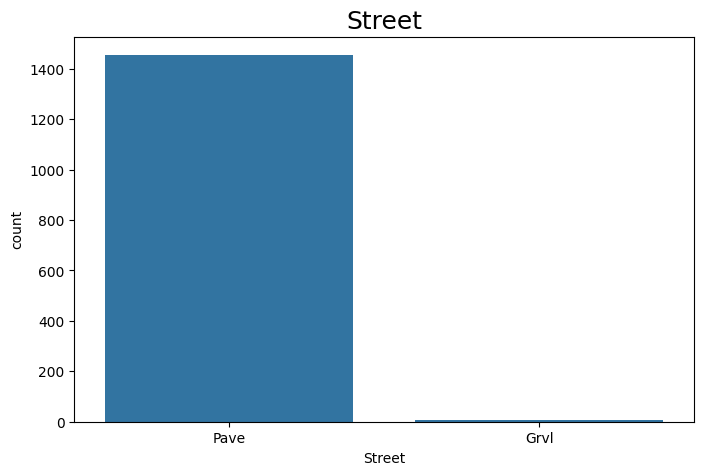

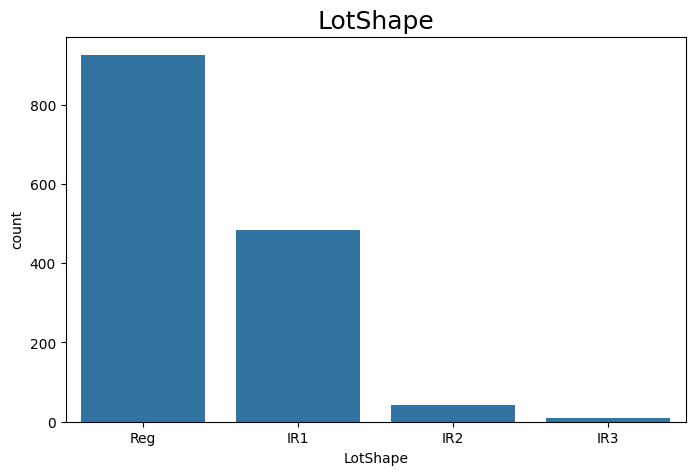

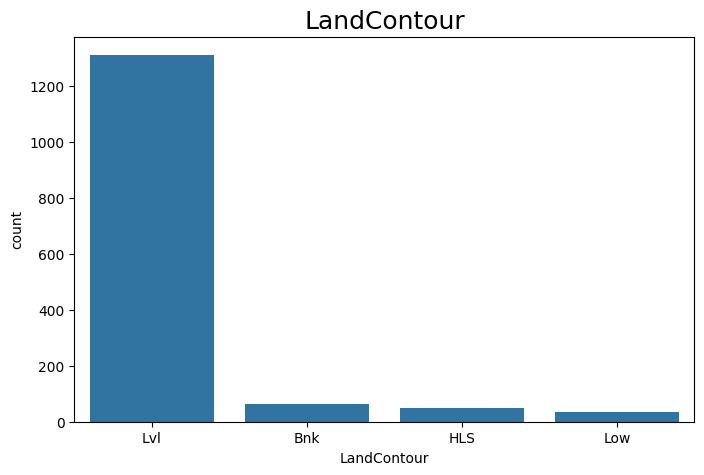

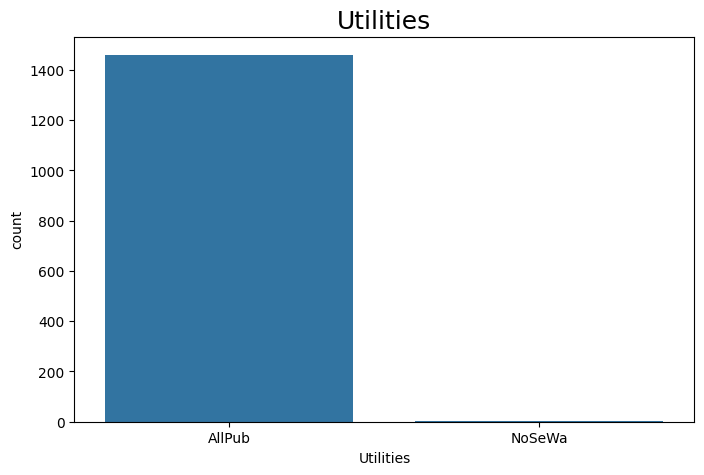

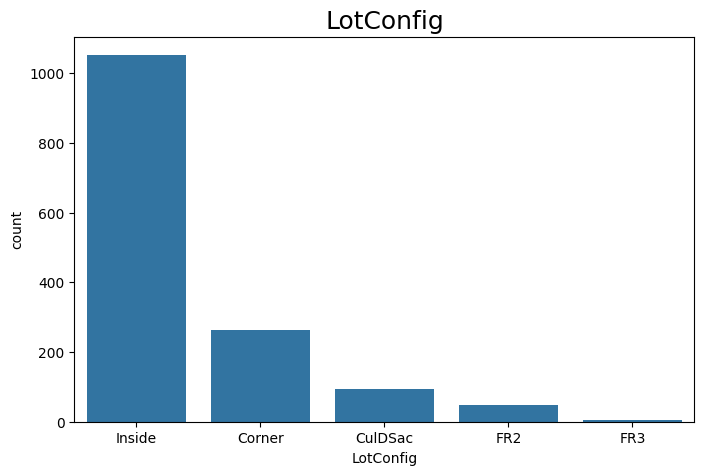

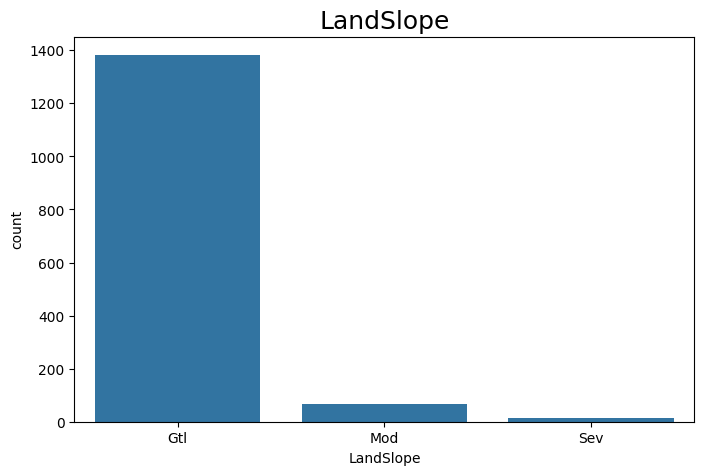

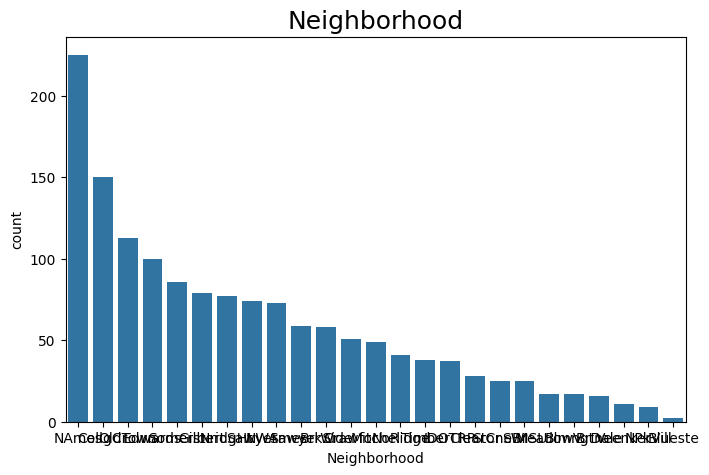

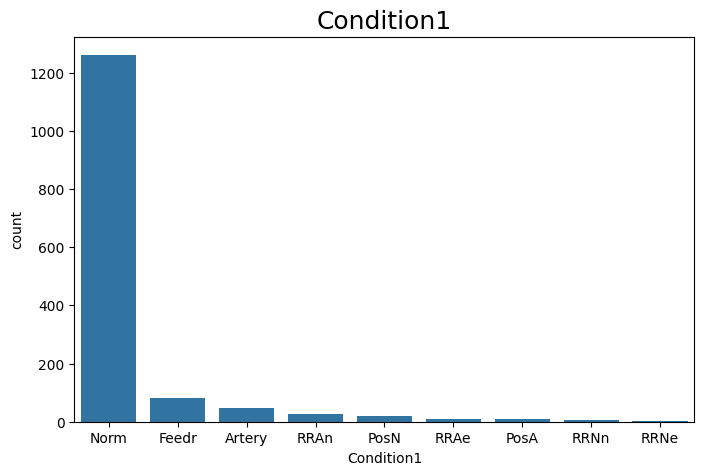

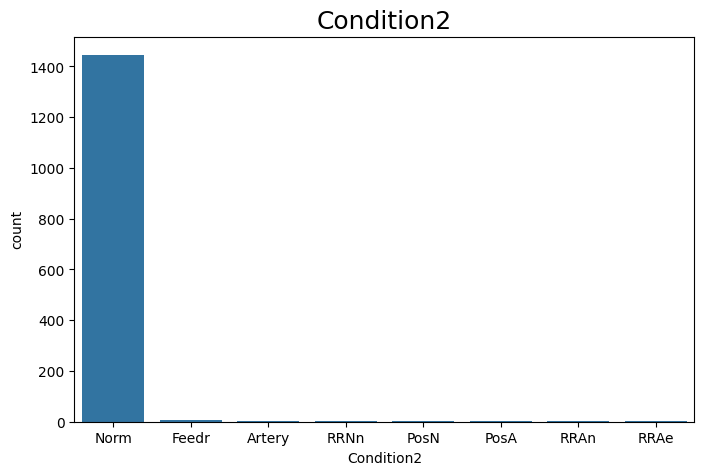

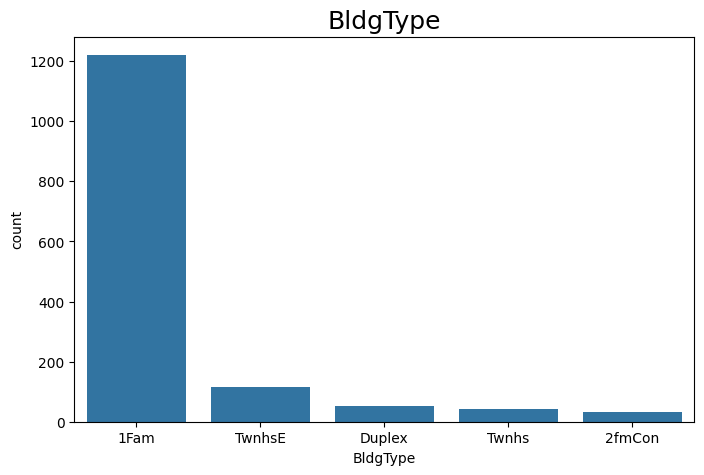

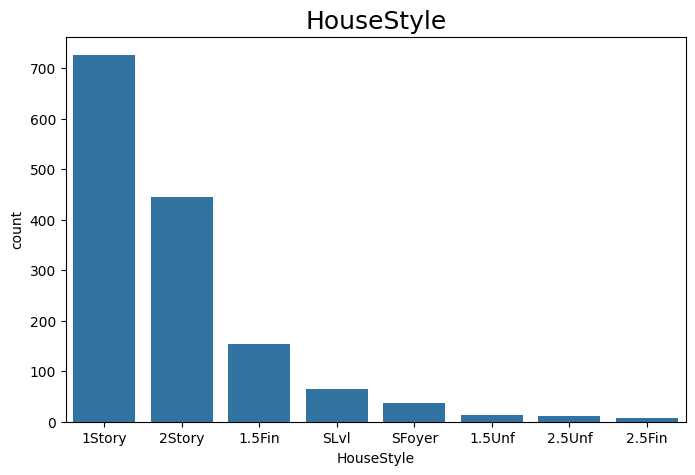

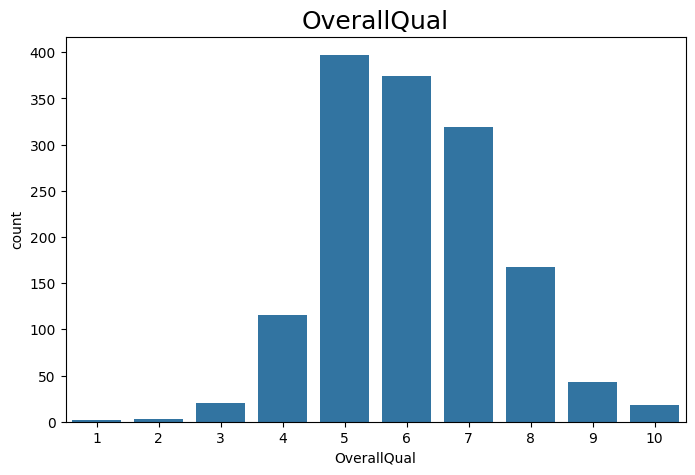

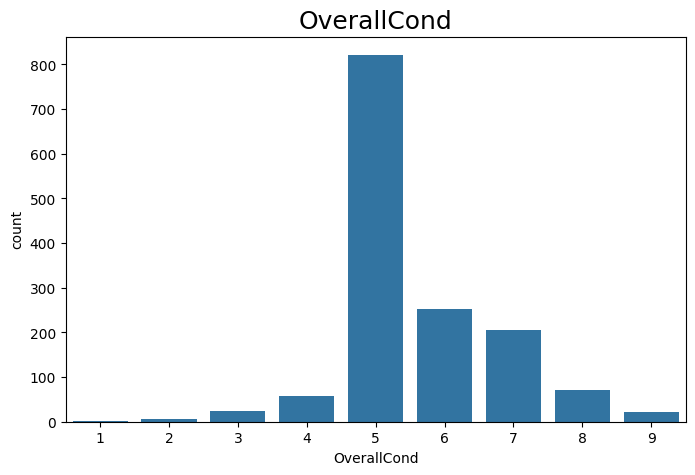

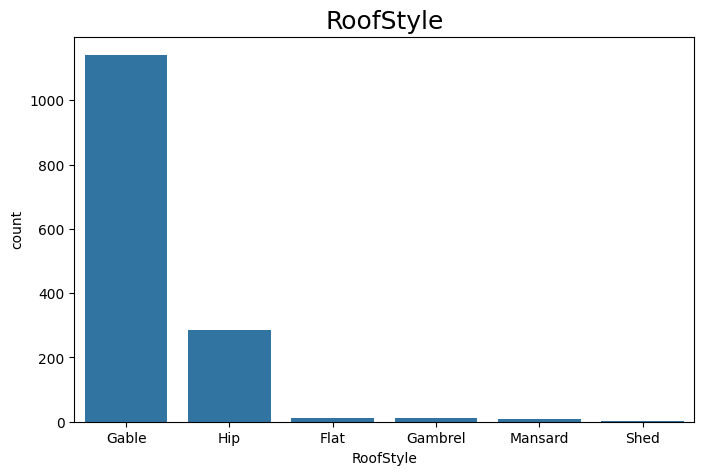

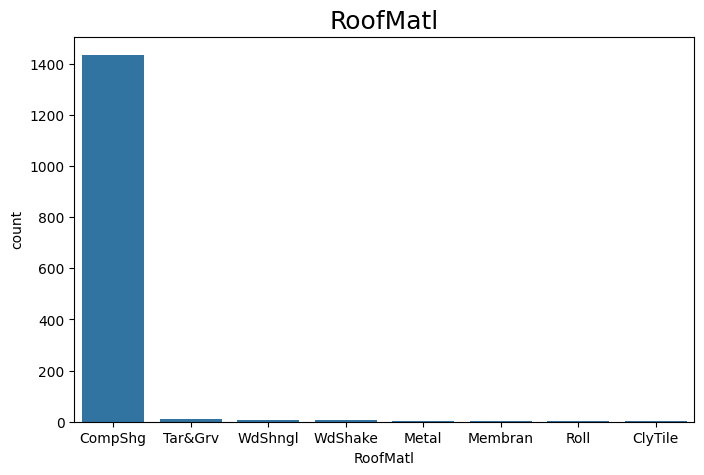

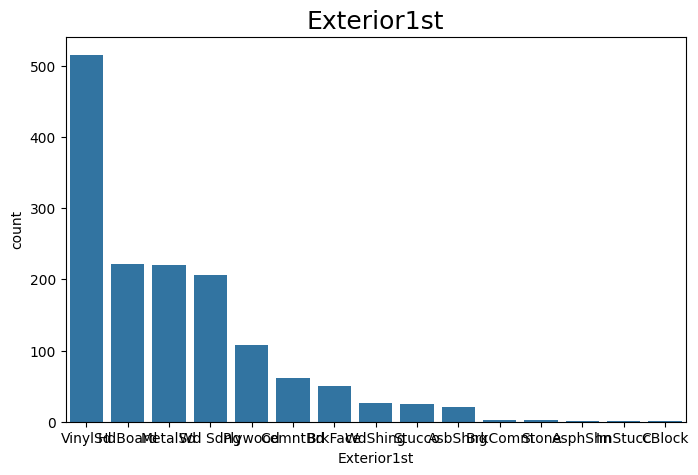

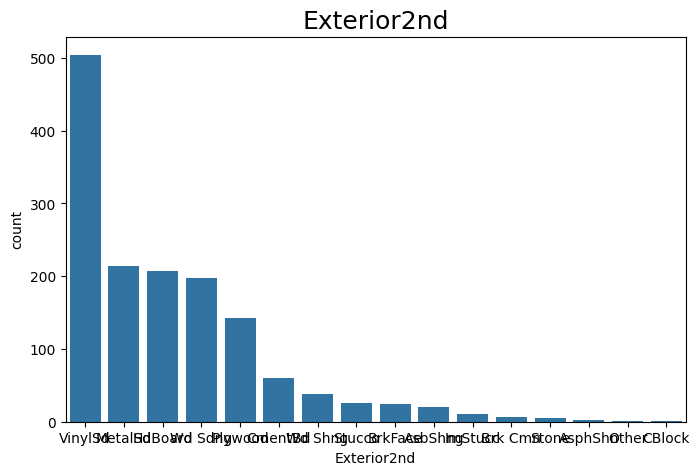

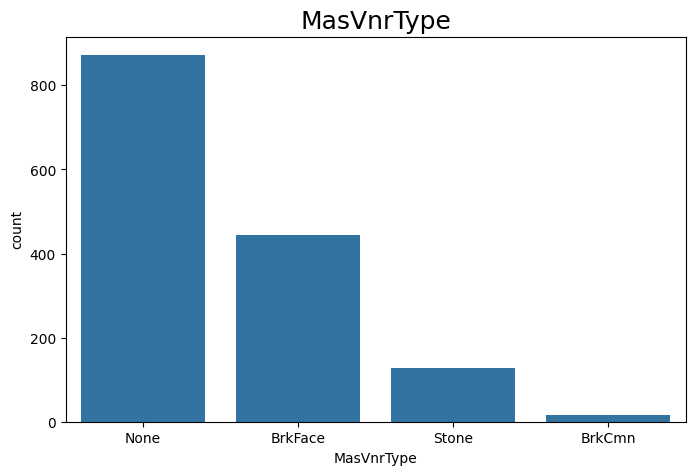

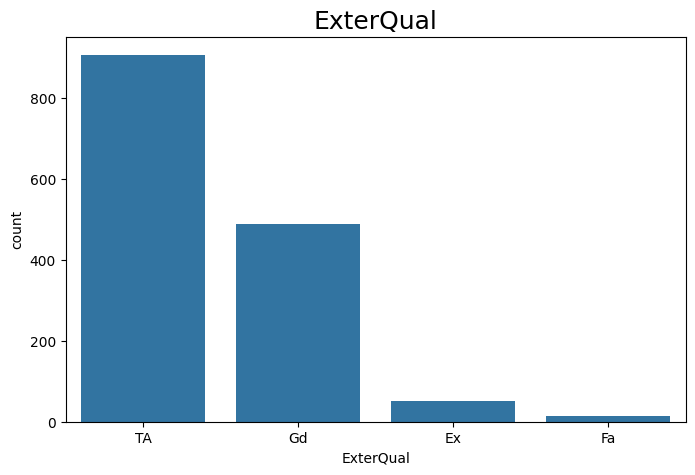

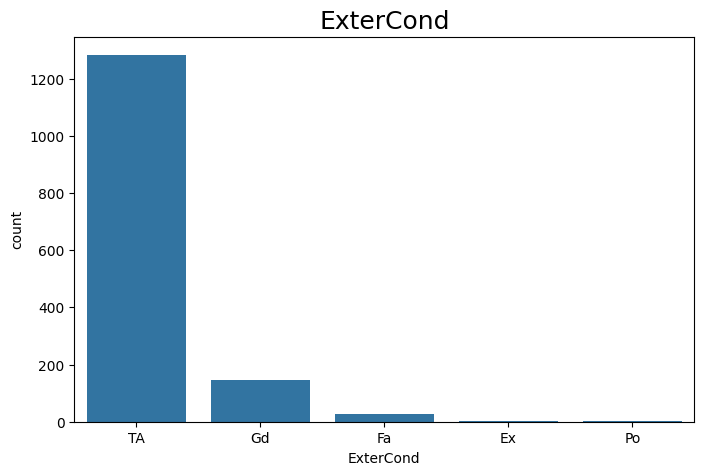

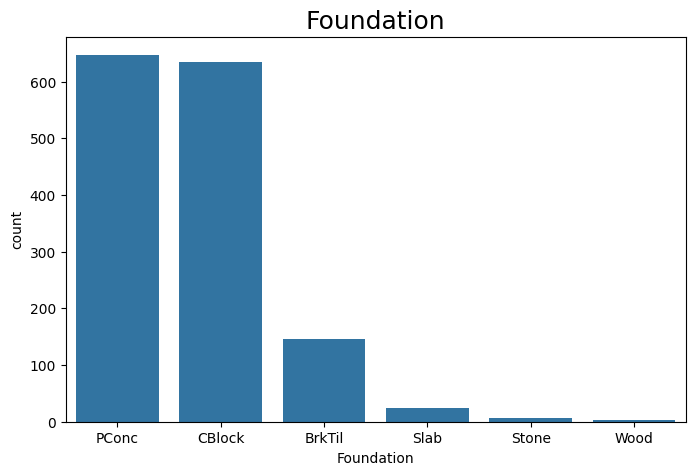

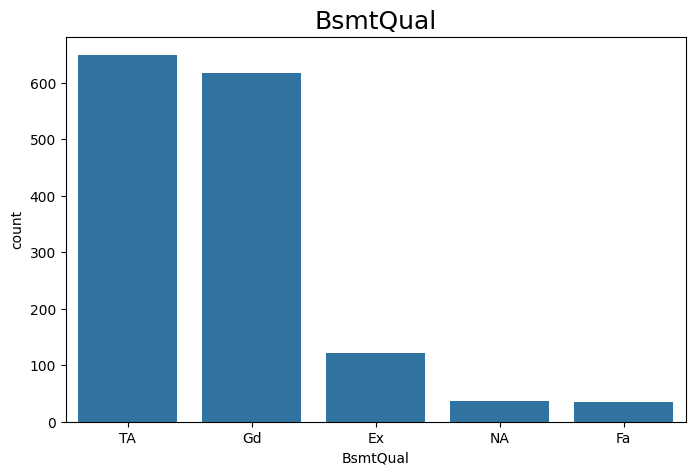

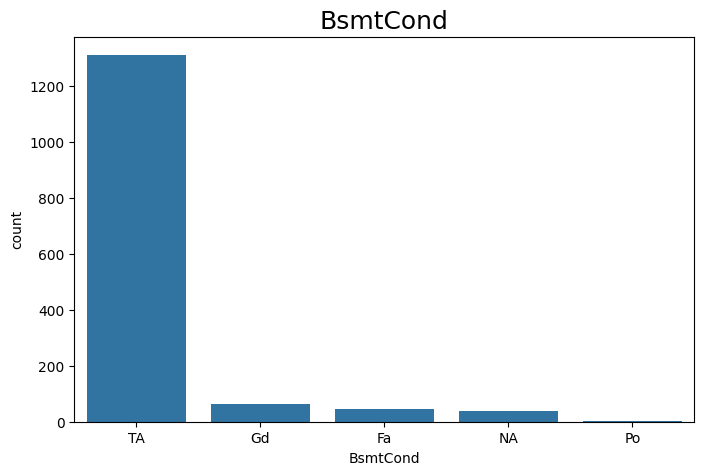

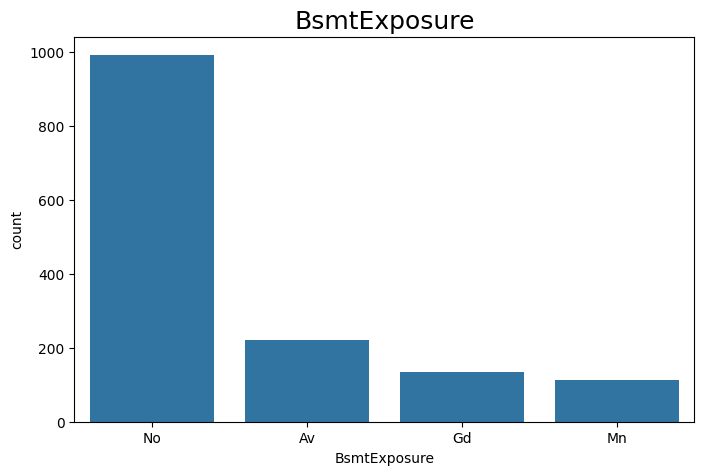

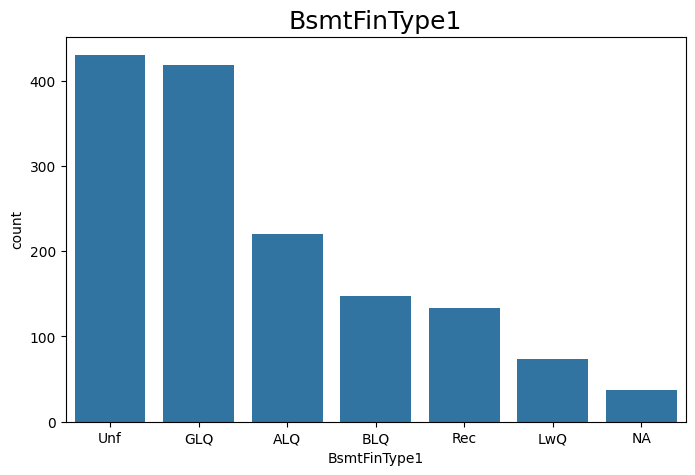

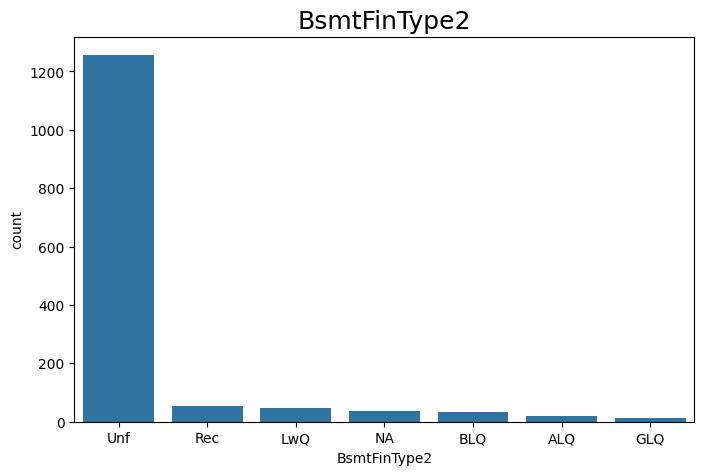

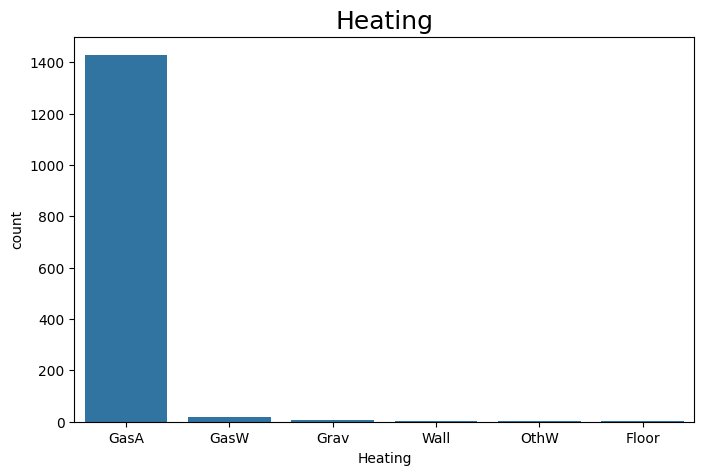

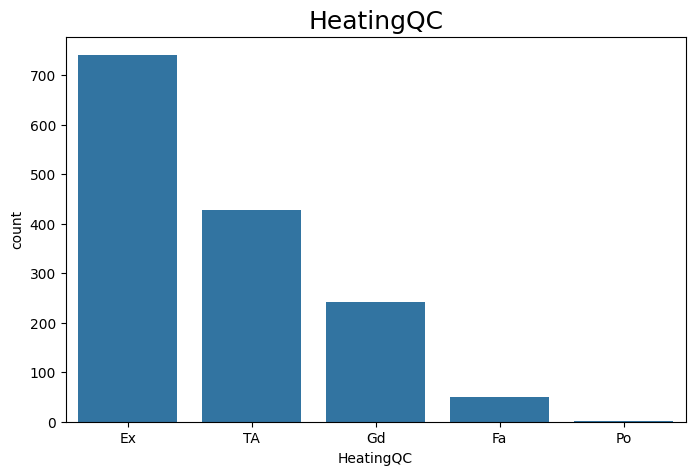

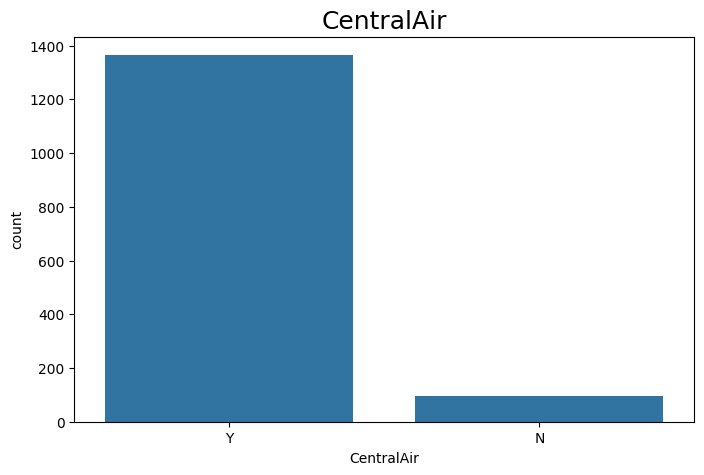

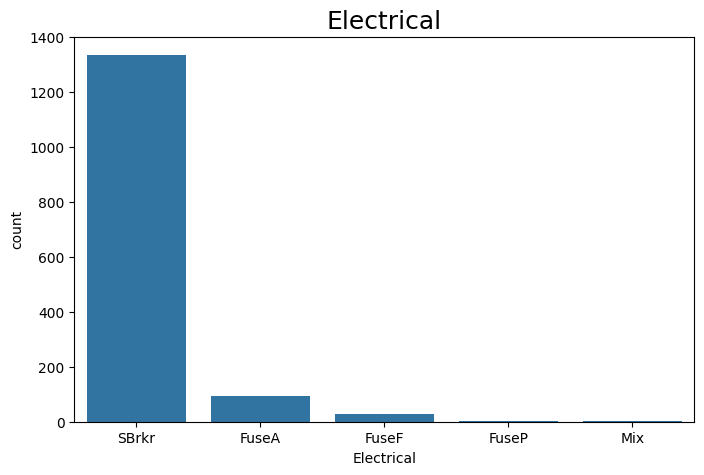

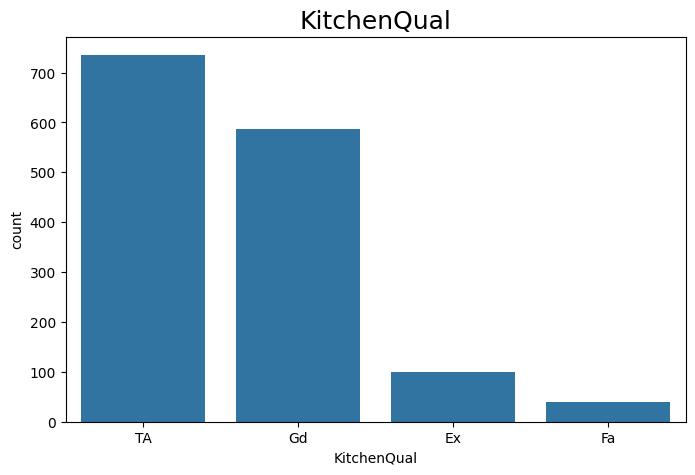

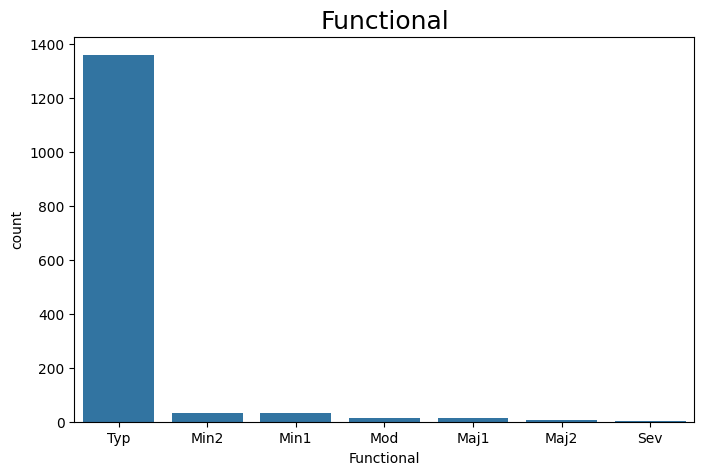

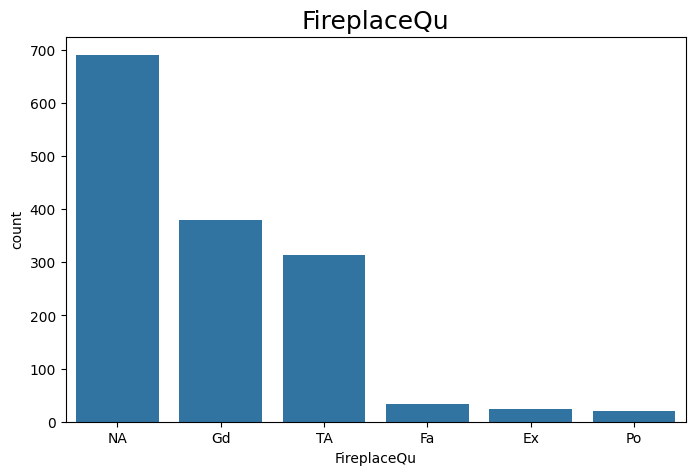

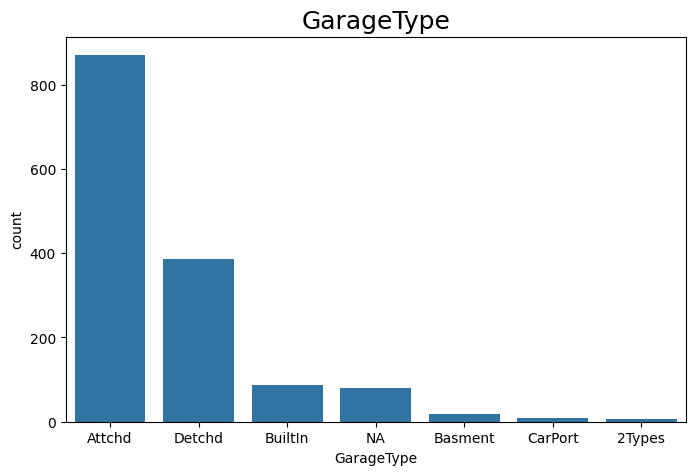

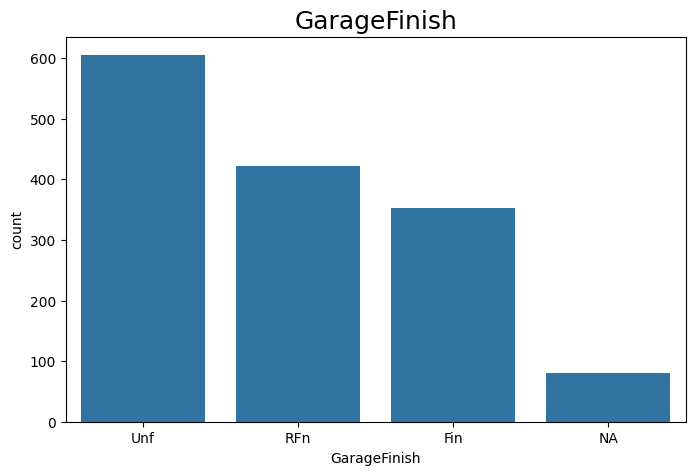

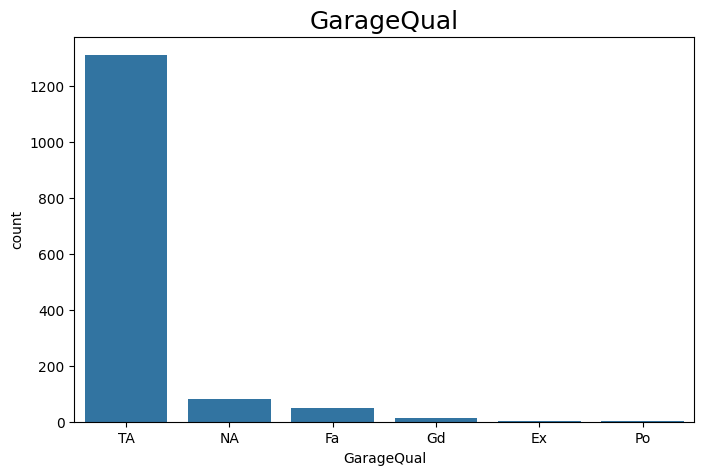

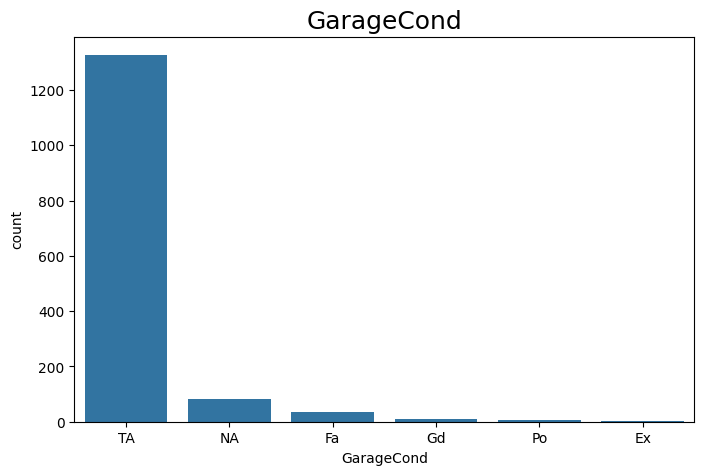

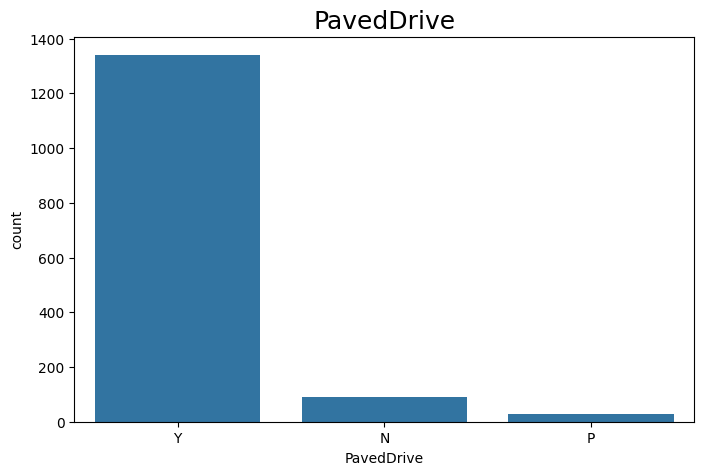

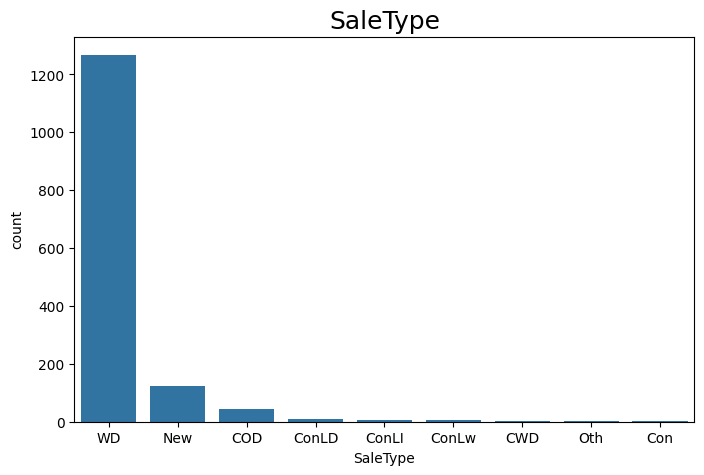

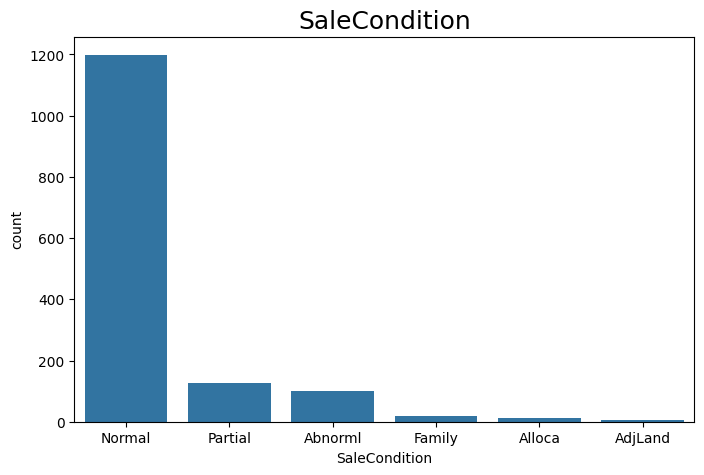

In [176]:
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot( df_cat[col].value_counts())
    plt.show()

From the above, we see that value counts and bar plots does not have a unique value for us to remove it.

#### Bivariate Analysis

##### Plotting heatmap to check the correlation among the numerical variable

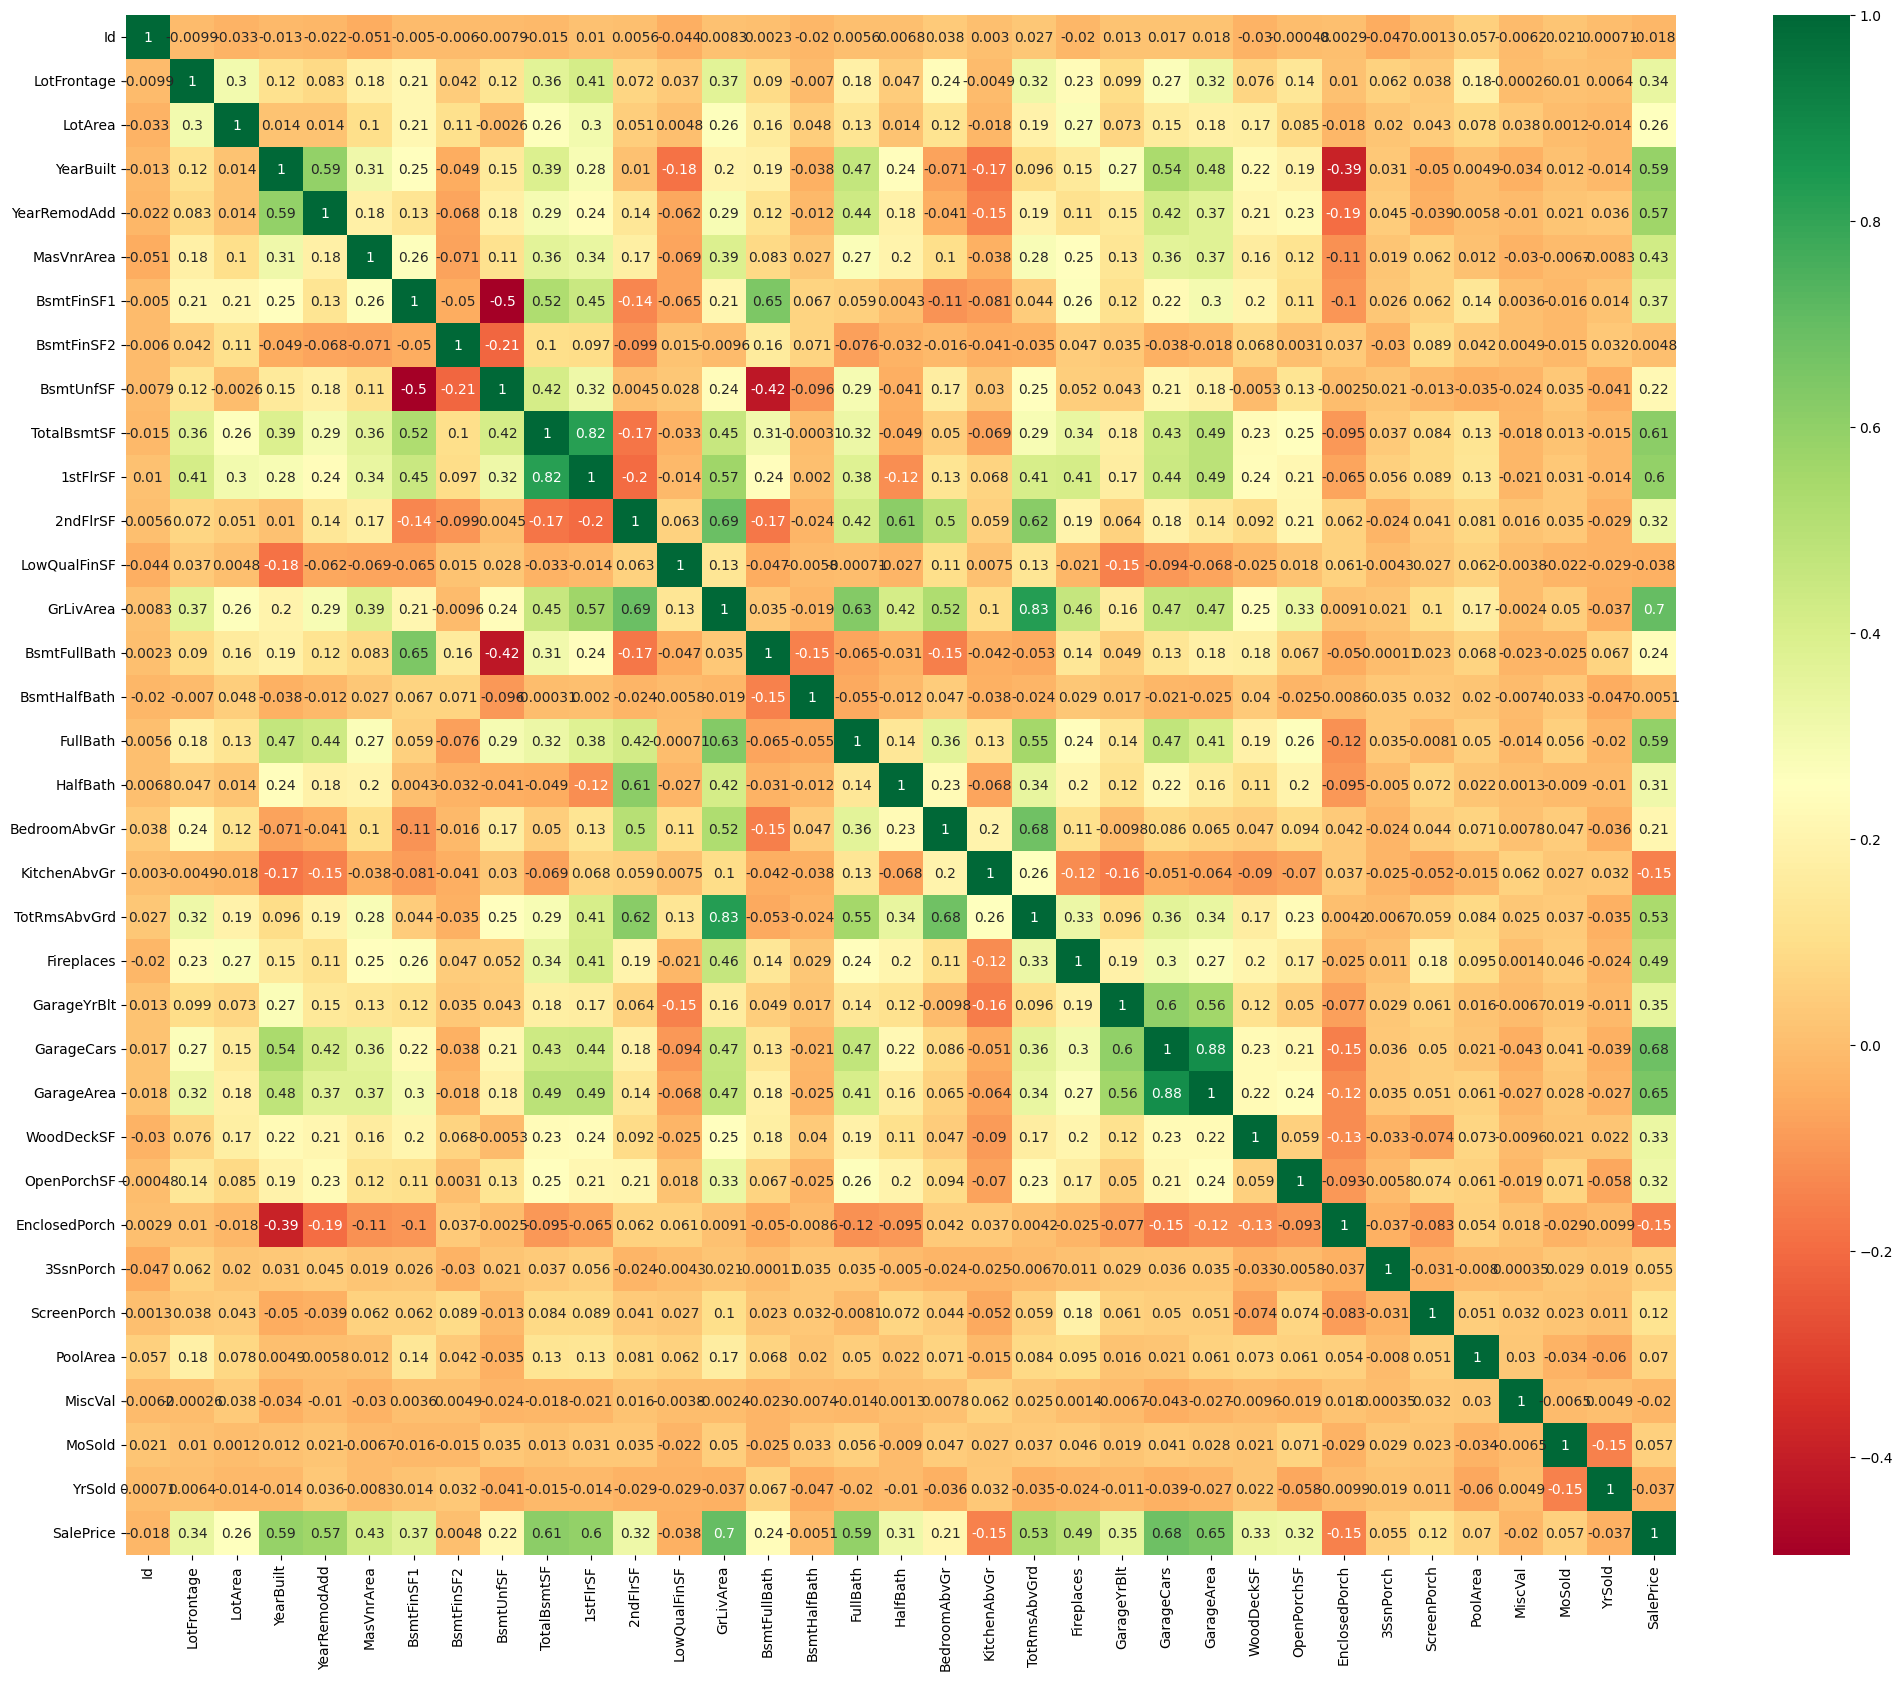

In [177]:
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

- Many Variable are highly correlated
- Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.

### Feature Engineering

#####  Create a new column for the age of the house

In [178]:
df.Age = df.YrSold - df.YearBuilt

##### Dropping the columns used to derive the age

In [179]:
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [180]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice
0   1         60       RL        65.00     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0          NA     Attchd     2,003.00          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2       WD        Normal      12.25
1   2         20       RL        80.00     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8          1976     Gable  CompShg     MetalSd     MetalSd       None        0.00        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1,976.00          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5       WD        Normal      12.11
2   3         60       RL        68.00    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2,001.00          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9       WD        Normal      12.32
3   4         70       RL        60.00     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5          1970     Gable  CompShg     Wd Sdng     Wd Shng       None        0.00        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1          Gd     Detchd  

#### Creating Dummy Variables

##### Create numerical and categorical columns again since we added and dropped columns

In [181]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [182]:
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)
df_cat_enc.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False   
1          False          False          False          False          False          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False   
2          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False   
3          False          False          False 

In [183]:
df_cat_enc.shape

(1460, 240)

#### Outlier treatment

##### Viewing Outliers using boxplot

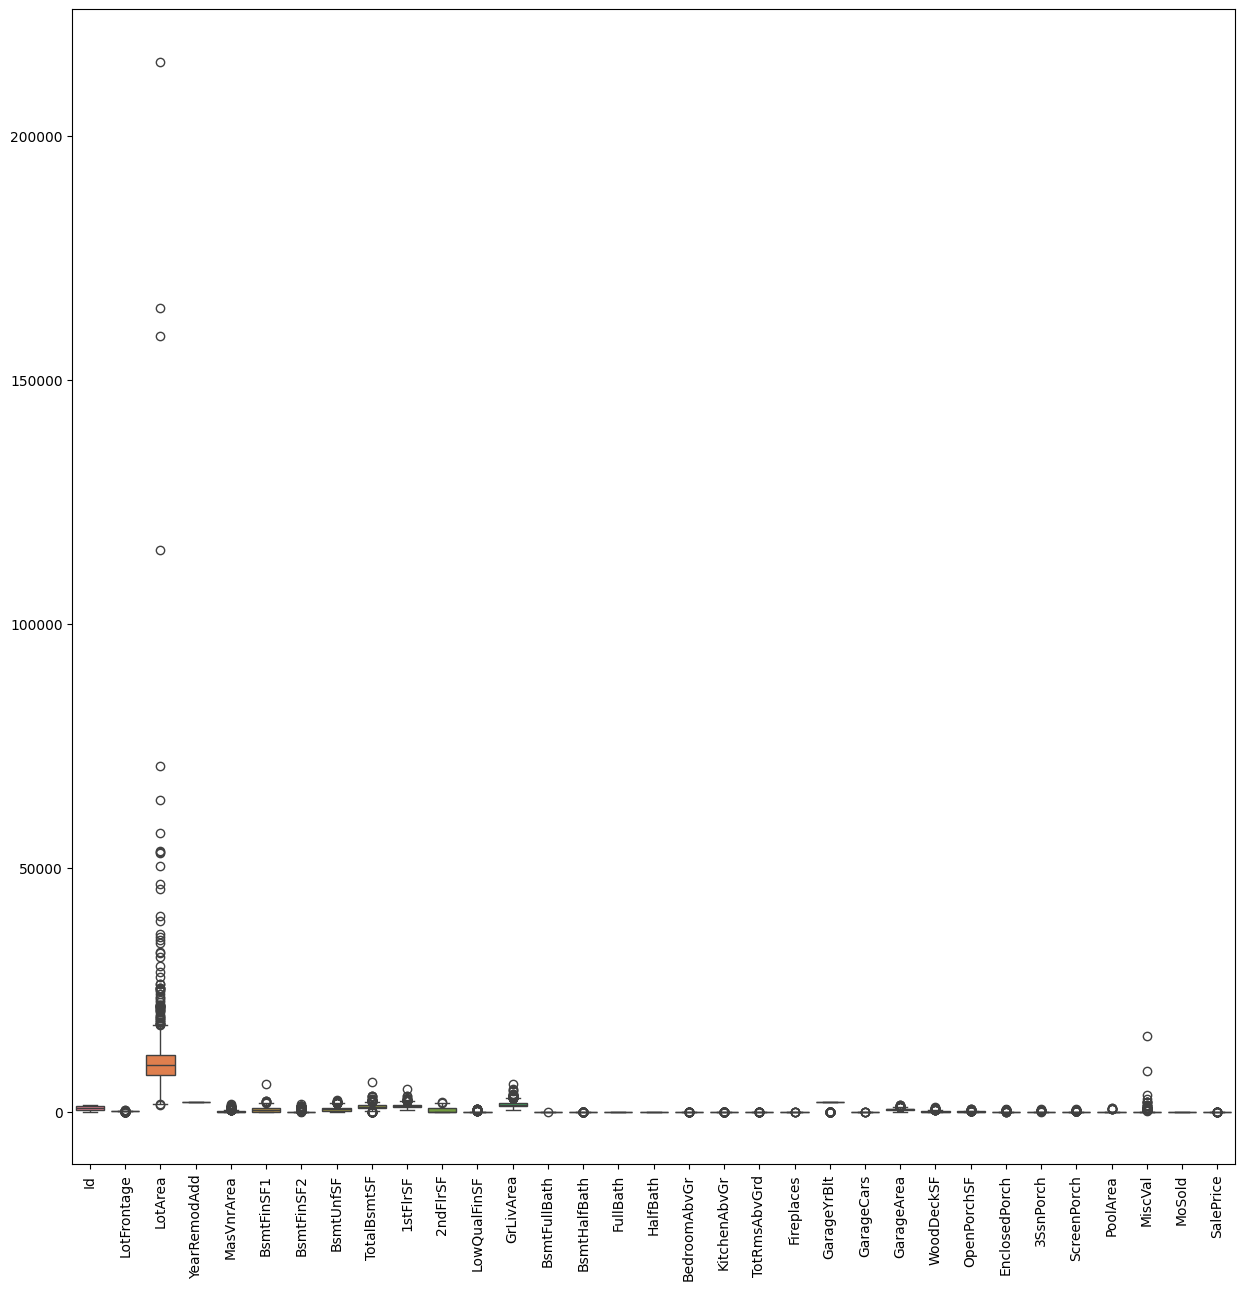

In [184]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

##### Capping outliers to 5% at lower bound and 95% at upper bound

In [185]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

##### Visualising after outlier treatment

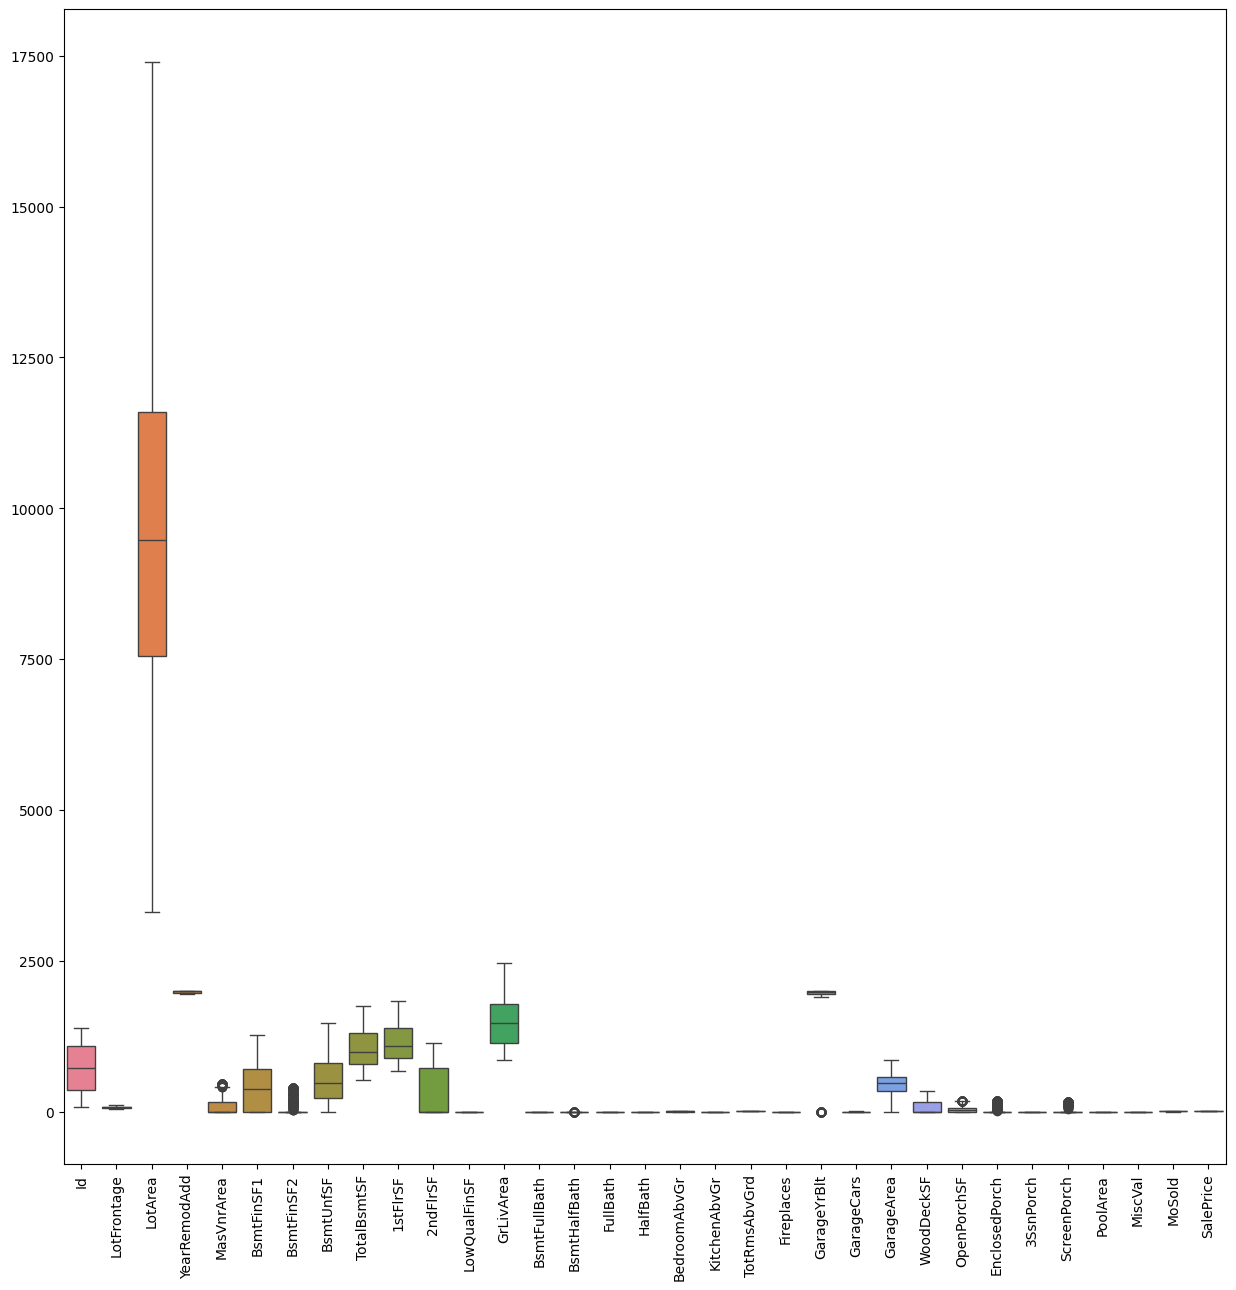

In [186]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

##### Join encoded category columns with outlier treated numerical columns

In [187]:
df = pd.concat([df_num, df_cat_enc], axis=1)

In [188]:
df.head()

Id  LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0 73.95        65.00  8,450.00          2003      196.00         706        0.00        150       856.00    856.00    854.00             0   1,710.00             1             0         2         1             3             1             8           0     2,003.00           2      548.00           0        61.00           0.00          0            0         0        0       2      12.25          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True   
1 73.95        80.00  9,600.00          1976        0.00         978        0.00        284     1,262.00  1,262.00      0.00             0   1,262.00             0             1         2         0             3             1             6           1     1,976.00           2      460.00         298         0.00           0.00          0            0         0        0       5      12.11          False          False          False          False          False          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False   
2 73.95        68.00 11,250.00          2002      162.00         486        0.00        434       920.00    920.00    866.00             0   1,786.00             1             0         2         1             3             1             6           1     2,001.00           2      608.00           0        42.00           0.00          0            0         0        0       9      12.32          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True   
3 73.95        60.00  9,550.00          1970 

### Model Building and evaluation

#### Split the data into dependent and target columns

In [189]:
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0        65.00  8,450.00          2003      196.00         706        0.00        150       856.00    856.00    854.00             0   1,710.00             1             0         2         1             3             1             8           0     2,003.00           2      548.00           0        61.00           0.00          0            0         0        0       2          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False   
1        80.00  9,600.00          1976        0.00         978        0.00        284     1,262.00  1,262.00      0.00             0   1,262.00             0             1         2         0             3             1             6           1     1,976.00           2      460.00         298         0.00           0.00          0            0         0        0       5          False          False          False          False          False          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False   
2        68.00 11,250.00          2002      162.00         486        0.00        434       920.00    920.00    866.00             0   1,786.00             1             0         2         1             3             1             6           1     2,001.00           2      608.00           0        42.00           0.00          0            0         0        0       9          False          False          False          False           True          False          False          False          False          False           False           False           False           False        False        False         True        False         True         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False   
3        60.00  9,550.0

In [190]:
y = df.SalePrice
y.shape

(1460,)

#### Split the data into train and test set

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [192]:
print(X_train.shape)
print(y_train.shape)

(1168, 271)
(1168,)


In [193]:
print(X_test.shape)
print(y_test.shape)

(292, 271)
(292,)


#### Scaling numerical columns

In [194]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [195]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Model 1: Ridge Regression

##### Define a function for checking metrics 

In [196]:
def calculate_metrics(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [197]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##### View the best aplha value for ridge

In [198]:
ridgeCV.best_params_

{'alpha': 5.0}

In [199]:
##### View the results of cross validation search

In [200]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.0835887 , 0.04908366, 0.06321359, 0.02648101, 0.01998777,
        0.0191329 , 0.01561832, 0.01327353, 0.01617022, 0.01358047,
        0.0140336 , 0.02263021, 0.01748376, 0.01424785, 0.01690512,
        0.01764607, 0.02248993, 0.02448335, 0.02508945, 0.02576442,
        0.02680616, 0.03000665, 0.02854452, 0.0266818 , 0.02535243,
        0.01924877, 0.01793127, 0.01839972]),
 'std_fit_time': array([0.02373642, 0.02458269, 0.02983843, 0.00245949, 0.00131116,
        0.00190623, 0.0012181 , 0.00057022, 0.0026245 , 0.00150966,
        0.00121962, 0.00209013, 0.00355816, 0.00054258, 0.00203646,
        0.00352211, 0.00391687, 0.00322442, 0.00242236, 0.00251307,
        0.00566555, 0.0038855 , 0.00487822, 0.00523276, 0.00349285,
        0.00120712, 0.00154599, 0.00090515]),
 'mean_score_time': array([0.00687032, 0.0059937 , 0.01013269, 0.00634465, 0.00537238,
        0.00523291, 0.00438156, 0.00418568, 0.00403781, 0.00399723,
        0.0042315 , 0.00591331, 0.004164

##### Create a ridge regreesion instance with optimum value alpha=5

In [201]:
ridge = Ridge(alpha=5)

In [202]:
ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [203]:
ridge.coef_

array([ 4.96398045e-03,  1.96923790e-02,  2.66660414e-02, -3.35206420e-03,
        3.74178429e-03, -2.74025606e-03, -1.86951113e-02,  5.81679226e-02,
       -1.59244027e-03,  1.92089019e-02,  0.00000000e+00,  9.49385904e-02,
        7.77010174e-03, -4.87130941e-04,  1.58607500e-02,  1.73840876e-02,
        7.36269327e-03,  0.00000000e+00, -2.34842327e-03,  1.44138724e-02,
        3.78194987e-03,  1.85907799e-02,  1.73328528e-02,  1.23231308e-02,
        7.02317330e-03,  7.72132038e-05,  0.00000000e+00,  9.34095039e-03,
        0.00000000e+00,  0.00000000e+00, -7.14001295e-04, -7.44799114e-02,
        9.44221640e-03, -6.74631475e-03, -1.58572018e-02,  1.02457621e-02,
        2.41385137e-02,  2.72848548e-02, -8.51355005e-03,  6.59627180e-03,
       -4.03924332e-02,  4.49470333e-03, -4.34140871e-02, -1.15301314e-02,
       -3.10194020e-02,  5.38864628e-02,  2.74482186e-02,  1.18369055e-02,
       -2.16436756e-02, -1.07956136e-02,  1.19048421e-02, -2.89117921e-02,
       -2.40964354e-03,  

##### Make predictions

In [204]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

##### Check metrics

In [205]:
ridge_metrics = calculate_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.74
RSS (Test) = 2.89
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


##### Creating dataframe of cross validation result

In [206]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0            0.08          0.02             0.01            0.00        0.00  {'alpha': 0.0001}              -0.08              -0.09              -0.09              -0.09              -0.08            -0.08            0.00               26               -0.05               -0.05               -0.06               -0.05               -0.06             -0.05             0.00
1            0.05          0.02             0.01            0.00        0.00   {'alpha': 0.001}              -0.08              -0.09              -0.09              -0.09              -0.08            -0.08            0.00               25               -0.05               -0.05               -0.06               -0.05               -0.06             -0.05             0.00
2            0.06          0.03             0.01            0.00        0.01    {'alpha': 0.01}              -0.08              -0.09              -0.09              -0.09              -0.08            -0.08            0.00               24               -0.06               -0.05               -0.06               -0.05               -0.06             -0.05             0.00
3            0.03          0.00             0.01            0.00        0.05    {'alpha': 0.05}              -0.08              -0.09              -0.09              -0.09              -0.08            -0.08            0.00               22               -0.06               -0.05               -0.06               -0.05               -0.06             -0.06             0.00
4            0.02          0.00             0.01            0.00        0.10     {'alpha': 0.1}              -0.07              -0.08              -0.08              -0.08              -0.08            -0.08            0.00               21               -0.06               -0.05               -0.06               -0.05               -0.06             -0.06             0.00
5            0.02          0.00             0.01            0.00        0.20     {'alpha': 0.2}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00               19               -0.06               -0.05               -0.06               -0.05               -0.06             -0.06             0.00
6            0.02          0.00             0.00            0.00        0.30     {'alpha': 0.3}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00               18               -0.06               -0.06               -0.06               -0.06               -0.06             -0.06             0.00
7            0.01          0.00             0.00            0.00        0.40     {'alpha': 0.4}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00               17               -0.06               -0.06               -0.06               -0.06               -0.06             -0.06             0.00
8            0.02          0.00             0.00            0.00        0.50     {'alpha': 0.5}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00               16               -0.06               -0.06               -0.06               -0.06               -0.06             -0.06             0.00
9            0.01          0.00             0.00            0.00        0.60     {'alpha': 0.6}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00               15    

##### Plotting R2 vs aplha values

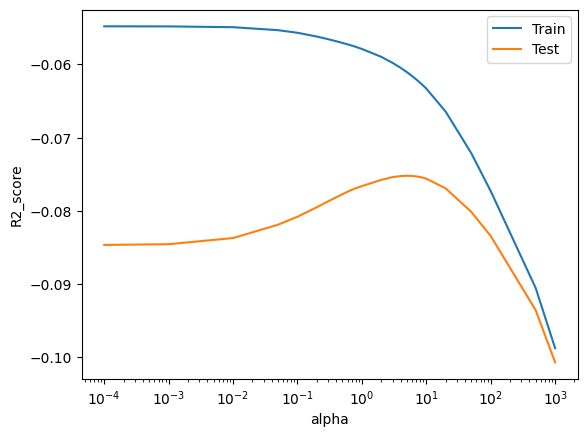

In [207]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

From the graph, we can see that optimum value of aplha is 5

#### Model 2: Lasso Regression

In [208]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##### View the optimal value of Aplha

In [209]:
lassoCV.best_params_

{'alpha': 0.0001}

##### View the results of cross validation search

In [210]:
lassoCV.cv_results_

{'mean_fit_time': array([0.17063012, 0.08153825, 0.04792027, 0.05621295, 0.03083854,
        0.02413168, 0.02318878, 0.02508612, 0.0260026 , 0.02476702,
        0.02424498, 0.02645068, 0.025669  , 0.02587838, 0.025459  ,
        0.02627206, 0.02845659, 0.02864213, 0.03096414, 0.02910762,
        0.02910676, 0.02134638, 0.02069635, 0.01908464, 0.01716323,
        0.01838923, 0.01930814, 0.01694789]),
 'std_fit_time': array([0.04509551, 0.04508442, 0.00659195, 0.01158558, 0.00677543,
        0.00476989, 0.00469779, 0.00175346, 0.00126426, 0.00164434,
        0.00103593, 0.00121166, 0.0013899 , 0.00207532, 0.00074565,
        0.00046782, 0.00350226, 0.00293491, 0.00342123, 0.00290651,
        0.00280544, 0.00120435, 0.00122615, 0.00156579, 0.0015958 ,
        0.00134066, 0.00087271, 0.00150438]),
 'mean_score_time': array([0.0100709 , 0.01122046, 0.01120095, 0.01054816, 0.00561004,
        0.00601172, 0.00644841, 0.00614467, 0.00618324, 0.0061285 ,
        0.00633402, 0.00614319, 0.006336

#### Build lasso regression for the optimum value of lasso

In [211]:
lasso = Lasso(alpha=0.0001)

In [212]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [213]:
lasso.coef_

array([ 4.69959053e-03,  2.05743102e-02,  2.52575192e-02, -3.60633869e-03,
       -0.00000000e+00, -4.06828463e-03, -2.12755637e-02,  6.33780881e-02,
       -1.57931709e-02,  7.04749154e-03,  0.00000000e+00,  1.10155001e-01,
        7.78841460e-03, -7.09030883e-04,  1.46718614e-02,  1.60865598e-02,
        6.33491727e-03,  0.00000000e+00, -1.50140006e-03,  1.37031089e-02,
        3.87491655e-03,  1.94877136e-02,  1.66621347e-02,  1.23410092e-02,
        6.45168783e-03,  0.00000000e+00,  0.00000000e+00,  9.20217215e-03,
        0.00000000e+00,  0.00000000e+00, -5.81951986e-04, -8.71319737e-02,
        0.00000000e+00, -0.00000000e+00, -1.43051251e-02,  3.05891412e-03,
        2.68197074e-03,  1.30414939e-02, -6.89723655e-03,  0.00000000e+00,
       -8.94225605e-02, -0.00000000e+00, -4.75057085e-02, -0.00000000e+00,
       -5.67449300e-02,  8.00201952e-02,  4.67901548e-02,  2.57479147e-02,
       -3.25360612e-03, -0.00000000e+00,  8.25795787e-03, -2.67247272e-02,
       -3.18821204e-03,  

#### Make Predictions

In [214]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

##### Check metrics

In [215]:
lasso_metrics = calculate_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 8.34
RSS (Test) = 3.14
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


##### Plot R2 values against different values of alpha

In [216]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0            0.17          0.05             0.01            0.00        0.00  {'alpha': 0.0001}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.01                1               -0.06               -0.06               -0.06               -0.06               -0.06             -0.06             0.00
1            0.08          0.05             0.01            0.01        0.00   {'alpha': 0.001}              -0.07              -0.08              -0.08              -0.08              -0.07            -0.08            0.00                2               -0.07               -0.07               -0.07               -0.07               -0.07             -0.07             0.00
2            0.05          0.01             0.01            0.00        0.01    {'alpha': 0.01}              -0.09              -0.11              -0.10              -0.10              -0.09            -0.10            0.01                3               -0.10               -0.10               -0.10               -0.10               -0.10             -0.10             0.00
3            0.06          0.01             0.01            0.01        0.05    {'alpha': 0.05}              -0.12              -0.14              -0.14              -0.13              -0.12            -0.13            0.01                4               -0.13               -0.13               -0.13               -0.13               -0.13             -0.13             0.00
4            0.03          0.01             0.01            0.00        0.10     {'alpha': 0.1}              -0.15              -0.17              -0.19              -0.17              -0.15            -0.17            0.01                5               -0.17               -0.16               -0.17               -0.17               -0.17             -0.17             0.00
5            0.02          0.00             0.01            0.00        0.20     {'alpha': 0.2}              -0.24              -0.25              -0.28              -0.26              -0.23            -0.25            0.02                6               -0.26               -0.25               -0.25               -0.25               -0.25             -0.25             0.00
6            0.02          0.00             0.01            0.00        0.30     {'alpha': 0.3}              -0.27              -0.29              -0.31              -0.29              -0.27            -0.29            0.01                7               -0.29               -0.28               -0.28               -0.28               -0.29             -0.29             0.00
7            0.03          0.00             0.01            0.00        0.40     {'alpha': 0.4}              -0.27              -0.29              -0.31              -0.29              -0.27            -0.29            0.01                7               -0.29               -0.28               -0.28               -0.28               -0.29             -0.29             0.00
8            0.03          0.00             0.01            0.00        0.50     {'alpha': 0.5}              -0.27              -0.29              -0.31              -0.29              -0.27            -0.29            0.01                7               -0.29               -0.28               -0.28               -0.28               -0.29             -0.29             0.00
9            0.02          0.00             0.01            0.00        0.60     {'alpha': 0.6}              -0.27              -0.29              -0.31              -0.29              -0.27            -0.29            0.01                7    

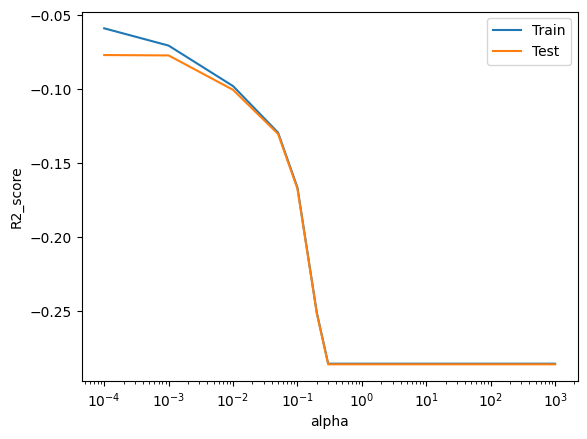

In [217]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

From the above graph we can see that, optimal value of alpha is 0.0001

### Comparing two models

##### Setting float limit options

In [218]:
pd.options.display.float_format = "{:,.2f}".format

##### Creating a table with all the metrics

In [219]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.94
R2 Score (Test)               0.93              0.92
RSS (Train)                   8.74              8.34
RSS (Test)                    2.89              3.14
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.08
RMSE (Test)                   0.10              0.10

R2 score for test data is more for Ridge Regression

##### Capturing the coefficients of all the attributes for Ridge and Lasso regression

In [220]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

[271 rows x 0 columns]

In [221]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [222]:
betas

Ridge  Lasso
LotFrontage             0.00   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.03   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.00  -0.00
...                      ...    ...
SaleCondition_AdjLand   0.03   0.06
SaleCondition_Alloca    0.10   0.19
SaleCondition_Family   -0.00   0.00
SaleCondition_Normal    0.04   0.05
SaleCondition_Partial   0.03   0.05

[271 rows x 2 columns]

##### View the features removed by Lasso

In [223]:
betas[betas['Lasso']==0]

Ridge  Lasso
BsmtFinSF1             0.00  -0.00
LowQualFinSF           0.00   0.00
KitchenAbvGr           0.00   0.00
EnclosedPorch          0.00   0.00
3SsnPorch              0.00   0.00
...                     ...    ...
GarageCond_Gd         -0.00   0.00
GarageCond_NA          0.00  -0.00
SaleType_ConLw         0.00   0.00
SaleType_WD            0.00   0.00
SaleCondition_Family  -0.00   0.00

[78 rows x 2 columns]

78 features are removed by Lasso

### Inference

##### Let us take a look at the top 10 features contributing to the prediction

In [224]:
betas['Ridge'].sort_values(ascending=False)[:10]

SaleCondition_Alloca   0.10
OverallQual_9          0.10
GrLivArea              0.09
OverallQual_8          0.09
OverallCond_9          0.09
Neighborhood_Crawfor   0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
Neighborhood_StoneBr   0.06
CentralAir_Y           0.06
Name: Ridge, dtype: float64

##### To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas


In [225]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

SaleCondition_Alloca   1.11
OverallQual_9          1.10
GrLivArea              1.10
OverallQual_8          1.09
OverallCond_9          1.09
Neighborhood_Crawfor   1.07
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
Neighborhood_StoneBr   1.07
CentralAir_Y           1.06
Name: Ridge, dtype: float64

In [226]:
betas['Lasso'].sort_values(ascending=False)[:10]

Condition2_PosA        0.31
SaleCondition_Alloca   0.19
OverallQual_9          0.14
OverallQual_8          0.12
OverallCond_9          0.11
GrLivArea              0.11
SaleType_Oth           0.11
RoofMatl_WdShngl       0.09
Neighborhood_Crawfor   0.08
MSZoning_FV            0.08
Name: Lasso, dtype: float64

In [227]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

Condition2_PosA        1.36
SaleCondition_Alloca   1.21
OverallQual_9          1.15
OverallQual_8          1.12
OverallCond_9          1.12
GrLivArea              1.12
SaleType_Oth           1.11
RoofMatl_WdShngl       1.09
Neighborhood_Crawfor   1.09
MSZoning_FV            1.08
Name: Lasso, dtype: float64

#### the features that will contribute more to prediction are listed below:

- Condition2_PosA
- SaleCondition_Alloca
- OverallQual_9
- OverallQual_8
- OverallCond_9
- GrLivArea
- SaleType_Oth
- RoofMatl_WdShngl
- Neighborhood_Crawfor
- MSZoning_FV

#### How well the above features describe the price of the house

| Predictor               | Increase by (times) |
|-------------------------|-------------|
| Condition2_PosA         | 1.36        |
| SaleCondition_Alloca    | 1.21        |
| OverallQual_9           | 1.15        |
| OverallQual_8           | 1.12        |
| OverallCond_9           | 1.12        |
| GrLivArea               | 1.12        |
| SaleType_Oth            | 1.11        |
| RoofMatl_WdShngl        | 1.09        |
| Neighborhood_Crawfor    | 1.09        |
| MSZoning_FV             | 1.08        |


#### Optimal Value of lambda for Ridge : 5
#### Optimal Value of lambda for Lasso : 0.0001

## Subjective Questions

Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Optimal Value of lambda for Ridge : 5
Optimal Value of lambda for Lasso : 0.0001

Building Ridge and Lasso model by doubling the alpha value

In [228]:
ridge = Ridge(alpha=10)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [229]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [230]:
ridge_metrics = calculate_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.26
RSS (Test) = 2.80
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [231]:
lasso = Lasso(alpha=0.0002)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [232]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [233]:
lasso_metrics = calculate_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 8.96
RSS (Test) = 2.99
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [234]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.93              0.94
R2 Score (Test)               0.93              0.92
RSS (Train)                   9.26              8.96
RSS (Test)                    2.80              2.99
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.09
RMSE (Test)                   0.10              0.10

Predictor values for Ridge after doubling alpha value

In [235]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

[271 rows x 0 columns]

In [236]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [237]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.09
OverallQual_8          1.09
SaleCondition_Alloca   1.07
Functional_Typ         1.07
OverallCond_9          1.07
Neighborhood_Crawfor   1.07
Exterior1st_BrkFace    1.07
CentralAir_Y           1.06
TotalBsmtSF            1.06
Name: Ridge, dtype: float64

In [238]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

SaleCondition_Alloca   1.16
OverallQual_9          1.15
Condition2_PosA        1.14
OverallCond_9          1.12
OverallQual_8          1.11
GrLivArea              1.11
Neighborhood_Crawfor   1.09
Functional_Typ         1.09
Exterior1st_BrkFace    1.09
Neighborhood_StoneBr   1.07
Name: Lasso, dtype: float64

Question 3

top 4 predictors as per lasso model are : Condition2_PosA,SaleCondition_Alloca,OverallQual_9,OverallQual_8,OverallCond_9

we will drop these and build the lasso model again

In [112]:
drop_columns = ['Condition2_PosA', 'SaleCondition_Alloca', 'OverallQual_9', 'OverallQual_8', 'OverallCond_9']

In [114]:
X_train_dropped = X_train.drop(drop_columns, axis=1)
X_test_dropped = X_test.drop(drop_columns, axis=1)

In [115]:
lasso = Lasso(alpha=0.0001)

In [116]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.0001)

In [117]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [119]:
lasso_metrics = calculate_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.77
RSS (Test) = 2.88
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [120]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)              0.94
R2 Score (Test)               0.93
RSS (Train)                   8.77
RSS (Test)                    2.88
MSE (Train)                   0.01
MSE (Test)                    0.01
RMSE (Train)                  0.09
RMSE (Test)                   0.10

In [121]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas


Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, ...]

[266 rows x 0 columns]

In [122]:
betas['Lasso'] = lasso.coef_

In [123]:
betas

Lasso
LotFrontage             0.00
LotArea                 0.02
YearRemodAdd            0.03
MasVnrArea             -0.00
BsmtFinSF1              0.00
...                      ...
SaleType_WD             0.00
SaleCondition_AdjLand   0.04
SaleCondition_Family   -0.00
SaleCondition_Normal    0.03
SaleCondition_Partial   0.05

[266 rows x 1 columns]

In [124]:
betas['Lasso'].sort_values(ascending=False)[:5]

RoofMatl_WdShngl      0.11
GrLivArea             0.10
SaleType_Oth          0.09
Functional_Typ        0.09
Exterior1st_BrkFace   0.08
Name: Lasso, dtype: float64